In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from math import sin, cos, sqrt, atan2, radians
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
import statsmodels.formula.api as smf

In [3]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn import clone
from sklearn.pipeline import Pipeline
from IPython.display import Image
from IPython import display
from sklearn.metrics import classification_report

In [4]:
ncaa_data = pd.read_csv('allseasons.csv').query("season<2019")
#ncaa_data = pd.read_csv('allseasons.csv').query("2009<season<2020")

# Pythag

In [5]:
ncaa_data['exp_win1'] = (ncaa_data['team1_adjoe']**11.5)/ ((ncaa_data['team1_adjde']**11.5)+(ncaa_data['team1_adjoe']**11.5))
ncaa_data['exp_win2'] = (ncaa_data['team2_adjoe']**11.5)/ ((ncaa_data['team2_adjde']**11.5)+(ncaa_data['team2_adjoe']**11.5))



ncaa_data['team1_log5'] = (ncaa_data['exp_win1'] - (ncaa_data['exp_win1']*ncaa_data['exp_win2']))/ (ncaa_data['exp_win1']+ncaa_data['exp_win2']-(2*ncaa_data['exp_win1']*ncaa_data['exp_win2']))

ncaa_data['seed_diff'] = ncaa_data['team1_seed'] - ncaa_data['team2_seed']
ncaa_data['srs_diff'] = ncaa_data['team1_SRS'] - ncaa_data['team2_SRS']
ncaa_data['TOV_diff'] =  ncaa_data['team2_TOV%']- ncaa_data['team1_TOV%']
ncaa_data['net_rating_diff'] = (ncaa_data['team1_adjoe'] - ncaa_data['team1_adjde']) - (ncaa_data['team2_adjoe'] - ncaa_data['team2_adjde'])


# Variables

### Log Odds

In [6]:
ncaa_data['team1_log5'] = (ncaa_data['exp_win1'] - (ncaa_data['exp_win1']*ncaa_data['exp_win2']))/ (ncaa_data['exp_win1']+ncaa_data['exp_win2']-(2*ncaa_data['exp_win1']*ncaa_data['exp_win2']))




### Seed Difference

In [7]:
ncaa_data['seed_diff'] = ncaa_data['team1_seed'] - ncaa_data['team2_seed']

### Distance

In [8]:
def distance(lat1, lon1, lat2, lon2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [9]:
ncaa_data['dist1'] = ncaa_data.apply(lambda row: distance(row['host_lat'], row['host_long'], row['team1_lat'], row['team1_long']), axis=1)
ncaa_data['dist2'] = ncaa_data.apply(lambda row: distance(row['host_lat'], row['host_long'], row['team2_lat'], row['team2_long']), axis=1)

In [10]:
ncaa_data['diff_dist'] = ncaa_data['dist1'] - ncaa_data['dist2']

### SRS

In [11]:
ncaa_data['srs_diff'] = ncaa_data['team1_SRS'] - ncaa_data['team2_SRS']

### Turnover %

In [12]:
ncaa_data['TOV_diff'] =  ncaa_data['team2_TOV%']- ncaa_data['team1_TOV%']

### True Shooting %

In [13]:
ncaa_data['TS_diff'] = ncaa_data['team1_TS%'] - ncaa_data['team2_TS%']

### True Rebounding %

In [14]:
ncaa_data['TRB_diff'] = ncaa_data['team1_TRB%'] - ncaa_data['team2_TRB%']

### Effective Field Goal %

In [15]:
ncaa_data['eFG_diff'] = ncaa_data['team1_eFG%'] - ncaa_data['team2_eFG%']

### Adjusted Tempo

In [16]:
ncaa_data['adjtempo_diff'] = ncaa_data['team1_adjtempo'] - ncaa_data['team2_adjtempo']

### Net Rating

In [17]:
ncaa_data['net_rating_diff'] = (ncaa_data['team1_adjoe'] - ncaa_data['team1_adjde']) - (ncaa_data['team2_adjoe'] - ncaa_data['team2_adjde'])

### Floor Percentage

In [17]:
#ncaa_data['floor_pct_diff'] = ncaa_data['floorpct_1'] - ncaa_data['floorpct_team2']

### Ast/Stl/Block Diff

In [18]:
ncaa_data['ast_stl_block_diff'] = (ncaa_data['team1_arate'] + ncaa_data['team1_stlrate'] + ncaa_data['team1_blockpct']) - (ncaa_data['team2_arate'] + ncaa_data['team2_stlrate'] + ncaa_data['team2_blockpct'])

### Win Tempo Diff

In [19]:
ncaa_data['win_tempo_diff'] = (((ncaa_data['team1_adjoe'] - 100) -(100 - ncaa_data['team2_adjde'])+100)/100*((ncaa_data['team1_adjtempo'] + ncaa_data['team2_adjtempo'])/2)) - (((ncaa_data['team2_adjoe'] - 100) - (100 - ncaa_data['team1_adjde'])+100)/100*((ncaa_data['team1_adjtempo']+ncaa_data['team2_adjtempo'])/2))

## Feature Selection Data 

In [20]:
ncaa_data.columns

Index(['team1_id', 'team1_score', 'team2_id', 'team2_score', 'WLoc', 'num_ot',
       'team1_position', 'team2_position', 'team1_seed', 'team2_seed',
       ...
       'net_rating_diff', 'dist1', 'dist2', 'diff_dist', 'TS_diff', 'TRB_diff',
       'eFG_diff', 'adjtempo_diff', 'ast_stl_block_diff', 'win_tempo_diff'],
      dtype='object', length=154)

In [21]:
ncaa_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 1111
Data columns (total 154 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   team1_id                        int64  
 1   team1_score                     int64  
 2   team2_id                        int64  
 3   team2_score                     int64  
 4   WLoc                            object 
 5   num_ot                          int64  
 6   team1_position                  object 
 7   team2_position                  object 
 8   team1_seed                      int64  
 9   team2_seed                      int64  
 10  strongseed                      int64  
 11  weakseed                        int64  
 12  team1_region                    object 
 13  team2_region                    object 
 14  slot                            object 
 15  team1_teamname                  object 
 16  team2_teamname                  object 
 17  season                          

In [567]:
#feature_data = ncaa_data['team1_fg2pct', 'team1_fg3pct', 'team1_ftpct', 'team1_blockpct', 'team1_oppfg2pct', 'team1','team1_log5','seed_diff','TS_diff','eFG_diff','adjtempo_diff','TRB_diff','TOV_diff','srs_diff', ]




# Analyzing Dataset

In [22]:
ncaa_data[['season','team1_teamname','team2_teamname','seed_diff','diff_dist','team1_log5','win_tempo_diff','srs_diff','net_rating_diff','ast_stl_block_diff','eFG_diff','TS_diff','TRB_diff','TOV_diff']]

,season,team1_teamname,team2_teamname,seed_diff,diff_dist,team1_log5,win_tempo_diff,srs_diff,net_rating_diff,ast_stl_block_diff,eFG_diff,TS_diff,TRB_diff,TOV_diff
0,2002,Siena,Alcorn St,0,-144.611318,0.647736,3.897304,8.53,5.5052,2.054800,-0.032,-0.013,-2.9,0.3
1,2002,Alabama,FL Atlantic,-13,-88.820532,0.911780,14.592809,NaN,20.6778,-6.210500,NaN,NaN,NaN,NaN
2,2002,Arizona,Santa Barbara,-11,-697.542289,0.789333,8.723791,NaN,12.6785,-10.777800,NaN,NaN,NaN,NaN
3,2002,Duke,Winthrop,-15,-191.666514,0.982148,25.289937,35.44,35.4617,3.759000,0.089,0.082,-1.4,2.2
4,2002,Indiana,Utah,-7,2148.977013,0.692962,4.361703,8.50,6.7140,-0.102700,-0.021,-0.017,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,2018,Loyola-Chicago,Kansas St,2,-284.535852,0.720863,5.297400,NaN,8.1000,1.503034,NaN,NaN,NaN,NaN
1108,2018,Michigan,Florida St,-6,-75.859795,0.648177,3.604000,3.25,5.3000,-2.563547,0.013,0.002,-1.5,3.0
1109,2018,Villanova,Kansas,0,1311.108325,0.695616,5.673050,5.25,8.3000,-3.455696,0.020,0.029,2.1,1.3
1110,2018,Michigan,Loyola-Chicago,-8,242.765505,0.486853,-0.064850,NaN,-0.1000,-3.181343,NaN,NaN,NaN,NaN


In [23]:
ncaa_data.fillna(0, inplace=True)

In [24]:
ncaa_data.describe()

,team1_id,team1_score,team2_id,team2_score,num_ot,team1_seed,team2_seed,strongseed,weakseed,season,...,net_rating_diff,dist1,dist2,diff_dist,TS_diff,TRB_diff,eFG_diff,adjtempo_diff,ast_stl_block_diff,win_tempo_diff
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,...,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000
mean,1294.275180,75.408273,1294.783273,64.000000,0.071043,5.151079,8.813849,3.920863,10.044065,2010.097122,...,5.732923,1149.796988,1361.227008,-211.430020,0.003558,0.485881,0.004128,0.165386,1.072892,3.871427
std,101.620939,10.715982,106.398732,10.417133,0.302089,3.992863,4.626117,3.114242,3.949141,4.903526,...,10.013258,961.226138,955.045752,1183.541653,0.028760,2.830620,0.031055,4.349185,8.061961,6.749832
min,1104.000000,47.000000,1102.000000,29.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2002.000000,...,-27.467200,2.943692,5.301674,-4783.214156,-0.091000,-10.400000,-0.100000,-13.933200,-24.564900,-18.408009
25%,1211.000000,68.000000,1209.000000,57.000000,0.000000,2.000000,5.000000,2.000000,7.000000,2006.000000,...,-0.867925,441.280365,606.268870,-824.694341,-0.010000,-0.700000,-0.008250,-2.482400,-4.270048,-0.576667
50%,1277.000000,75.000000,1295.000000,64.000000,0.000000,4.000000,9.000000,3.000000,11.000000,2010.000000,...,4.714100,839.616459,1100.254144,-192.285523,0.000000,0.000000,0.000000,0.191850,1.245200,3.164674
75%,1393.000000,82.000000,1393.000000,71.000000,0.000000,8.000000,13.000000,5.250000,13.000000,2014.000000,...,11.253575,1643.787538,1948.648184,407.356420,0.018000,2.000000,0.021000,2.881600,6.539525,7.494838
max,1463.000000,121.000000,1463.000000,105.000000,2.000000,16.000000,16.000000,16.000000,16.000000,2018.000000,...,40.683600,4640.730409,6097.602761,3917.144567,0.119000,15.100000,0.133000,19.116500,26.841100,27.051705


In [25]:
ncaa_data.isna().sum().sort_values(ascending=True)

team1_id                         0
team2_adjtempo                   0
team2_oe                         0
team2_adjoe                      0
team2_de                         0
                                ..
team2_pt_coach_season_wins       0
team2_pt_coach_season_losses     0
team1_ap_final                   0
team2_pt_career_school_losses    0
win_tempo_diff                   0
Length: 154, dtype: int64

In [26]:
new_data_ncaa = ncaa_data[['exp_win1','team1_log5','diff_dist','seed_diff','srs_diff','net_rating_diff','win_tempo_diff','ast_stl_block_diff','eFG_diff','TS_diff','TRB_diff','TOV_diff']].copy()

In [27]:
new_corr = new_data_ncaa.corr()
new_corr

,exp_win1,team1_log5,diff_dist,seed_diff,srs_diff,net_rating_diff,win_tempo_diff,ast_stl_block_diff,eFG_diff,TS_diff,TRB_diff,TOV_diff
exp_win1,1.000000,0.520027,-0.152581,-0.457344,0.366563,0.500123,0.498998,0.152299,0.184751,0.173156,0.185697,0.140232
team1_log5,0.520027,1.000000,-0.225908,-0.877185,0.684567,0.967765,0.966357,0.313388,0.268282,0.248955,0.300128,0.237729
diff_dist,-0.152581,-0.225908,1.000000,0.215890,-0.123423,-0.217772,-0.218591,-0.038046,-0.107649,-0.099958,-0.078573,-0.019748
seed_diff,-0.457344,-0.877185,0.215890,1.000000,-0.644486,-0.867398,-0.867164,-0.289698,-0.204425,-0.193189,-0.230164,-0.200545
srs_diff,0.366563,0.684567,-0.123423,-0.644486,1.000000,0.684053,0.687362,0.220975,0.337598,0.318503,0.348600,0.332539
net_rating_diff,0.500123,0.967765,-0.217772,-0.867398,0.684053,1.000000,0.999188,0.308037,0.301087,0.286900,0.273258,0.255638
win_tempo_diff,0.498998,0.966357,-0.218591,-0.867164,0.687362,0.999188,1.000000,0.309390,0.303797,0.289447,0.273171,0.254234
ast_stl_block_diff,0.152299,0.313388,-0.038046,-0.289698,0.220975,0.308037,0.309390,1.000000,0.125821,0.075752,0.146192,-0.123592
eFG_diff,0.184751,0.268282,-0.107649,-0.204425,0.337598,0.301087,0.303797,0.125821,1.000000,0.962429,0.077272,-0.012822
TS_diff,0.173156,0.248955,-0.099958,-0.193189,0.318503,0.286900,0.289447,0.075752,0.962429,1.000000,0.072689,-0.019001


<IPython.core.display.Javascript object>

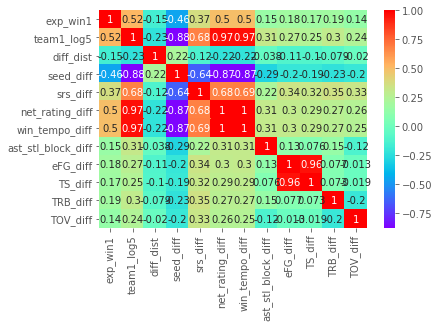

In [565]:
sns.heatmap(data=new_corr, annot = True, cmap = "rainbow");

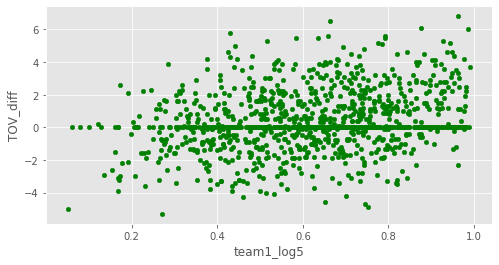

In [40]:
ncaa_data.plot(x="team1_log5", y = "TOV_diff", kind="scatter", figsize=(8,4), color="green" );

# First Logistic Model

## Split Data

In [28]:
ncaa_data.dropna(subset=['team1_log5'], inplace=True)

In [29]:
ncaa_data['team1_win'] = (ncaa_data['team1_score']>ncaa_data['team2_score']).astype(int)

In [30]:
training_columns = ['game_id','season','team1_win','exp_win1','exp_win2','team2_score',
                                    'team1_score','team1_id','team2_id','team1_log5','seed_diff','TS_diff','eFG_diff','adjtempo_diff','TRB_diff','TOV_diff','srs_diff']
ncaa_data_1 = ncaa_data.sample(frac=.5, random_state=15)[training_columns]
ncaa_data_2 = ncaa_data[~ncaa_data.index.isin(ncaa_data_1.index)][training_columns].reset_index(drop=True)
ncaa_data_1 = ncaa_data_1.reset_index(drop=True)

In [31]:
ncaa_data_2['team1_win'] = 0
ncaa_data_2['team1_log5'] = 1-ncaa_data_2['team1_log5']
ncaa_data_2['game_id'] = (ncaa_data_2['game_id'].str.split('-', expand=True)[0] 
                           + '-' + ncaa_data_2['game_id'].str.split('-', expand=True)[2] 
                           + '-' + ncaa_data_2['game_id'].str.split('-', expand=True)[1]
                           ) 
ncaa_data_2['seed_diff'] = ncaa_data_2['seed_diff']*-1
ncaa_data_2.columns = ['game_id','season','team1_win','exp_win1','exp_win2','team2_score',
                                    'team1_score','team1_id','team2_id','team1_log5','seed_diff','TS_diff','eFG_diff','adjtempo_diff','TRB_diff','TOV_diff','srs_diff']

In [32]:
ncaa_train = pd.concat([ncaa_data_2, ncaa_data_1]).reset_index(drop=True)

In [33]:
train, test = train_test_split(ncaa_train, train_size=.7)

In [34]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [35]:
train

,game_id,season,team1_win,exp_win1,exp_win2,team2_score,team1_score,team1_id,team2_id,team1_log5,seed_diff,TS_diff,eFG_diff,adjtempo_diff,TRB_diff,TOV_diff,srs_diff
0,2005-1228-1314,2005,0,0.957522,0.971417,70,75,1314,1228,0.601229,0,0.011,0.000,8.5211,2.8,-3.5,4.31
1,2003-1242-1429,2003,1,0.937882,0.642647,61,64,1242,1429,0.893569,-13,0.017,0.031,10.9333,-0.4,0.0,20.84
2,2009-1242-1295,2009,1,0.906645,0.756309,74,84,1242,1295,0.757826,-11,0.000,0.000,-0.1590,0.0,0.0,0.00
3,2013-1276-1196,2013,1,0.910654,0.956122,59,79,1276,1196,0.318685,1,-0.001,-0.003,2.4882,-1.5,2.3,-2.59
4,2017-1433-1388,2017,0,0.935053,0.838832,77,85,1388,1433,0.265521,3,0.000,0.000,-9.1244,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,2016-1114-1345,2016,1,0.804586,0.939235,83,85,1114,1345,0.210346,7,0.000,0.000,-3.8354,0.0,0.0,0.00
774,2004-1435-1301,2004,1,0.868978,0.925852,73,75,1435,1301,0.346898,3,0.000,0.000,2.5557,0.0,0.0,0.00
775,2016-1421-1437,2016,0,0.951098,0.617317,56,86,1437,1421,0.076589,13,0.056,0.056,-3.2244,-0.3,1.5,22.98
776,2004-1400-1462,2004,0,0.881929,0.875919,71,79,1462,1400,0.485881,-4,0.014,0.013,-1.3608,-2.9,-1.9,-4.68


## Initial Check

In [36]:
train.groupby('team1_win')['team1_log5'].mean()

team1_win
0    0.383156
1    0.624155
Name: team1_log5, dtype: float64

In [580]:
train.groupby('team1_win')['seed_diff'].mean()

team1_win
0    3.329825
1   -4.095541
Name: seed_diff, dtype: float64

In [124]:
train.groupby('team1_win')['net_rating_diff'].mean()

KeyError: 'Column not found: net_rating_diff'

In [586]:
train.groupby('team1_win')['srs_diff'].mean()

team1_win
0    3.842042
1    4.014323
Name: srs_diff, dtype: float64

## Training Logistic Model

In [744]:
logit = LogisticRegression()
logit.fit(train[['team1_log5','seed_diff','TS_diff','eFG_diff','adjtempo_diff','TRB_diff','TOV_diff','srs_diff']], train['team1_win'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [745]:
smlogit = smf.logit("team1_win ~ team1_log5 + seed_diff + TS_diff + eFG_diff + adjtempo_diff + TOV_diff + TRB_diff + srs_diff", train).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.689971
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  778
Model:                          Logit   Df Residuals:                      769
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                0.004507
Time:                        15:47:58   Log-Likelihood:                -536.80
converged:                       True   LL-Null:                       -539.23
Covariance Type:            nonrobust   LLR p-value:                    0.7724
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0194      0.424     -0.046      0.963      -0.850       0.811
team1_log5        0.0532      0.812      0.065      0.948      -1.538       1.645
seed_diff         0.0085      0.024      0.357      0.721      -0.038       0.055
TS_diff         -14.8137      9.423     -1.572      0.116     -33.282       3.654
eFG_diff         13.6101      8.729      1.559      0.119      -3.499      30.719
adjtempo_diff     0.0061      0.017      0.351      0.726      -0.028       0.040
TOV_diff          0.0511      0.047      1.090      0.276      -0.041       0.143
TRB_diff         -0.0085      0.029     -0.290      0.772      -0.066       0.049
srs_diff         -0.0050      0.014     -0.351      0.726      -0.033       0.023
=================================================================================
"""

In [589]:
test['prob'] = logit.predict_proba(test[['team1_log5','seed_diff','TS_diff','eFG_diff','adjtempo_diff','TRB_diff','TOV_diff','srs_diff']])[:,1]
test['prediction'] = logit.predict(test[['team1_log5','seed_diff','TS_diff','eFG_diff','adjtempo_diff','TRB_diff','TOV_diff','srs_diff']])

In [590]:
accuracy_score(test['team1_win'], test['prediction'],)

0.7120622568093385

In [42]:
precision_score(test['team1_win'], test['prediction'])

0.6964285714285714

In [45]:
recall_score(test['team1_win'], test['prediction'])

0.7619047619047619

In [46]:
f1_score(test['team1_win'], test['prediction'])

0.7335243553008596

In [591]:
log_loss(test['team1_win'].values, test['prob'].values)

0.5744059552252642

In [44]:
def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    fig, ax = plt.subplots()
    ax.set(title='Receiver Operating Characteristic',
           xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

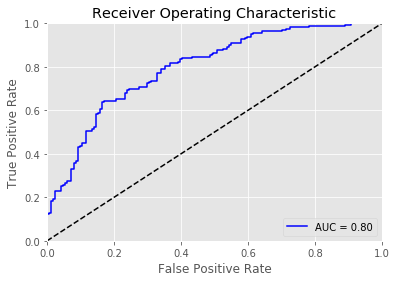

In [45]:
fpr, tpr, thresholds = roc_curve(test['team1_win'].values, test['prob'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [46]:
roc_auc_score(test['team1_win'].values, test['prob'].values)

0.7962903167940301

# Second Logistic Model

### Variables used: Log5, seed_diff, win_tempo_diff, TRB_diff, TOV_diff, srs_diff, net_rating_diff

## droppin seed diff cuz of correlation with net_rating_diff

In [37]:
ncaa_data.dropna(subset=['team1_log5'], inplace=True)

In [38]:
ncaa_data['team1_win'] = (ncaa_data['team1_score']>ncaa_data['team2_score']).astype(int)

In [39]:
training_columns = ['game_id','season','team1_win','exp_win1','exp_win2','team2_score',
                                    'team1_score','team1_id','team2_id','team1_log5','win_tempo_diff','TRB_diff','srs_diff', 'net_rating_diff']
ncaa_data_1 = ncaa_data.sample(frac=.5, random_state=15)[training_columns]
ncaa_data_2 = ncaa_data[~ncaa_data.index.isin(ncaa_data_1.index)][training_columns].reset_index(drop=True)
ncaa_data_1 = ncaa_data_1.reset_index(drop=True)

In [40]:
ncaa_data_2['team1_win'] = 0
ncaa_data_2['team1_log5'] = 1-ncaa_data_2['team1_log5']
ncaa_data_2['game_id'] = (ncaa_data_2['game_id'].str.split('-', expand=True)[0] 
                           + '-' + ncaa_data_2['game_id'].str.split('-', expand=True)[2] 
                           + '-' + ncaa_data_2['game_id'].str.split('-', expand=True)[1]
                           ) 
#ncaa_data_2['seed_diff'] = ncaa_data_2['seed_diff']*-1
ncaa_data_2.columns = ['game_id','season','team1_win','exp_win1','exp_win2','team2_score',
                                    'team1_score','team1_id','team2_id','team1_log5','win_tempo_diff','TRB_diff','srs_diff', 'net_rating_diff']

In [41]:
ncaa_train = pd.concat([ncaa_data_2, ncaa_data_1]).reset_index(drop=True)

In [42]:
train, test = train_test_split(ncaa_train, train_size=.75)

In [43]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [44]:
train

,game_id,season,team1_win,exp_win1,exp_win2,team2_score,team1_score,team1_id,team2_id,team1_log5,win_tempo_diff,TRB_diff,srs_diff,net_rating_diff
0,2015-1268-1434,2015,1,0.828921,0.749909,62,65,1268,1434,0.617717,2.839743,-4.0,7.03,4.4649
1,2002-1425-1423,2002,0,0.775347,0.903343,89,93,1423,1425,0.730306,-6.026295,0.0,0.00,-8.8712
2,2013-1393-1285,2013,1,0.902467,0.585343,34,81,1393,1285,0.867633,10.788890,3.3,21.49,16.8104
3,2016-1114-1345,2016,1,0.804586,0.939235,83,85,1114,1345,0.210346,-8.085900,0.0,0.00,-12.1849
4,2018-1347-1254,2018,1,0.597169,0.500000,61,71,1347,1254,0.597169,2.346750,0.0,0.00,3.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2011-1429-1243,2011,0,0.856961,0.897738,68,73,1243,1429,0.594371,-2.074564,-1.0,1.36,-3.1486
830,2006-1116-1137,2006,0,0.804317,0.868942,55,59,1137,1116,0.617309,-3.099605,2.2,-7.72,-4.7121
831,2007-1310-1197,2007,1,0.438614,0.287438,69,77,1310,1197,0.659500,4.074848,0.1,6.32,5.9184
832,2004-1435-1444,2004,1,0.868978,0.847595,58,71,1435,1444,0.543909,0.751045,0.0,0.00,1.1121


## all vars included

In [57]:
logit = LogisticRegression()
logit.fit(train[['team1_log5','win_tempo_diff','TRB_diff','srs_diff', 'net_rating_diff']], train['team1_win'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
smlogit = smf.logit("team1_win ~ team1_log5 + win_tempo_diff + TRB_diff + srs_diff + net_rating_diff", train).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.534291
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  834
Model:                          Logit   Df Residuals:                      828
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                  0.2292
Time:                        09:46:43   Log-Likelihood:                -445.60
converged:                       True   LL-Null:                       -578.06
Covariance Type:            nonrobust   LLR p-value:                 3.433e-55
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.9809      0.243    -12.251      0.000      -3.458      -2.504
team1_log5          5.9120      0.444     13.322      0.000       5.042       6.782
win_tempo_diff      0.1272      0.411      0.310      0.757      -0.678       0.932
TRB_diff            0.0130      0.030      0.425      0.671      -0.047       0.073
srs_diff            0.0076      0.019      0.401      0.689      -0.029       0.045
net_rating_diff    -0.0896      0.276     -0.325      0.745      -0.630       0.450
===================================================================================
"""

In [59]:
test['prob'] = logit.predict_proba(test[['team1_log5','win_tempo_diff','TRB_diff','srs_diff','net_rating_diff']])[:,1]
test['prediction'] = logit.predict(test[['team1_log5','win_tempo_diff','TRB_diff','srs_diff','net_rating_diff']])

In [60]:
accuracy_score(test['team1_win'], test['prediction'],)

0.6906474820143885

In [63]:
precision_score(test['team1_win'], test['prediction'])

0.738562091503268

In [64]:
recall_score(test['team1_win'], test['prediction'])

0.7847222222222222

In [65]:
f1_score(test['team1_win'], test['prediction'])

0.7609427609427609

In [61]:
log_loss(test['team1_win'].values, test['prob'].values)

0.5831716232266143

In [60]:
def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    fig, ax = plt.subplots()
    ax.set(title='Receiver Operating Characteristic',
           xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

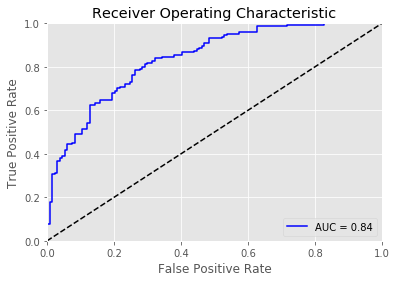

In [61]:
fpr, tpr, thresholds = roc_curve(test['team1_win'].values, test['prob'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [69]:
roc_auc_score(test['team1_win'].values, test['prob'].values)

0.7917184908789386

# Create Example Submission

In [ ]:
ncaa_data = pd.read_csv('allseasons.csv').query("season<2019")

In [213]:
example_submission = pd.read_csv('allseasonsplus2019.csv').query("season==2019").reset_index(drop=True)



In [204]:
example_submission

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,...,team2_3PAr,team2_TS%,team2_TRB%,team2_AST%,team2_STL%,team2_BLK%,team2_eFG%,team2_TOV%,team2_ORB%,team2_FT/FGA
0,1192,82,1341,76,N,0,X16a,X16b,16,16,...,34.1,53.0,46.7,49.3,12.2,4.6,49.3,15.2,29.8,28.9
1,1125,81,1396,70,N,0,W11a,W11b,11,11,...,37.4,53.4,48.2,54.5,12.0,6.2,49.9,13.8,26.1,23.6
2,1295,78,1300,74,N,0,W16a,W16b,16,16,...,36.1,54.5,54.8,60.2,8.9,7.5,51.2,18.8,35.1,23.9
3,1113,74,1385,65,N,0,X11a,X11b,11,11,...,38.5,54.8,45.8,50.0,12.1,9.8,51.8,13.0,21.4,21.2
4,1278,86,1257,76,N,0,W10,W07,10,7,...,43.7,55.3,52.4,53.6,6.3,7.9,50.9,15.2,29.0,27.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1438,80,1345,75,N,0,Z01,Z03,1,3,...,45.5,56.3,53.7,53.6,9.1,12.6,53.6,13.5,33.8,21.5
63,1120,77,1246,71,N,1,Y05,Y02,5,2,...,29.6,57.1,56.9,51.2,8.8,13.4,53.0,15.9,36.4,31.0
64,1403,61,1277,51,N,0,X03,W02,3,2,...,37.8,58.5,56.1,66.8,7.5,13.7,55.2,16.0,33.2,25.3
65,1438,63,1120,62,N,0,Z01,Y05,1,5,...,49.4,56.9,49.2,52.1,13.2,15.6,54.3,14.3,31.6,22.1


In [214]:
example_submission['exp_win1'] = (example_submission['team1_adjoe']**11.5)/ ((example_submission['team1_adjde']**11.5)+(example_submission['team1_adjoe']**11.5))
example_submission['exp_win2'] = (example_submission['team2_adjoe']**11.5)/ ((example_submission['team2_adjde']**11.5)+(example_submission['team2_adjoe']**11.5))

In [ ]:
X=train[['team1_log5','net_rating_diff', 'srs_diff','diff_oppfg3pct',
'diff_blockpct', 'seed_diff']]

In [215]:
example_submission['team1_log5'] = (example_submission['exp_win1'] - (example_submission['exp_win1']*example_submission['exp_win2']))/ (example_submission['exp_win1']+example_submission['exp_win2']-(2*example_submission['exp_win1']*example_submission['exp_win2']))
example_submission['seed_diff'] = example_submission['team1_seed'] - example_submission['team2_seed']
example_submission['net_rating_diff'] = (example_submission['team1_adjoe'] - example_submission['team1_adjde']) - (example_submission['team2_adjoe'] - example_submission['team2_adjde'])
example_submission['srs_diff'] = example_submission['team1_SRS'] - example_submission['team2_SRS']
example_submission['win_tempo_diff'] = (((example_submission['team1_adjoe'] - 100) -(100 - example_submission['team2_adjde'])+100)/100*((example_submission['team1_adjtempo'] + example_submission['team2_adjtempo'])/2)) - (((example_submission['team2_adjoe'] - 100) - (100 - example_submission['team1_adjde'])+100)/100*((example_submission['team1_adjtempo']+example_submission['team2_adjtempo'])/2))
example_submission['TRB_diff'] = example_submission['team1_TRB%'] - example_submission['team2_TRB%']
example_submission['diff_oppfg3pct'] = example_submission['team1_oppfg3pct'] - example_submission['team2_oppfg3pct']
example_submission['diff_blockpct'] = example_submission['team1_blockpct'] - example_submission['team2_blockpct']
#example_submission['TOV_diff'] =  example_submission['team2_TOV%']- example_submission['team1_TOV%']
#example_submission['ast_stl_block_diff'] = (example_submission['team1_arate'] + example_submission['team1_stlrate'] + example_submission['team1_blockpct']) - (example_submission['team2_arate'] + example_submission['team2_stlrate'] + example_submission['team2_blockpct'])

In [207]:
example_submission.describe()

,team1_id,team1_score,team2_id,team2_score,num_ot,team1_seed,team2_seed,strongseed,weakseed,season,...,exp_win1,exp_win2,team1_log5,seed_diff,net_rating_diff,srs_diff,win_tempo_diff,TRB_diff,diff_oppfg3pct,diff_blockpct
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,1293.104478,76.358209,1292.194030,63.880597,0.044776,4.910448,8.910448,3.985075,9.835821,2019.0,...,0.903527,0.794185,0.667692,-4.000000,8.734884,7.411791,5.840223,0.914925,-0.927550,1.614715
std,104.789274,9.613282,100.083032,10.249202,0.208373,4.140456,4.634297,3.453117,4.176402,0.0,...,0.106590,0.170557,0.215716,6.203616,11.725394,9.614411,7.849123,3.995424,3.250436,3.534397
min,1113.000000,53.000000,1101.000000,44.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2019.0,...,0.389061,0.208404,0.211625,-15.000000,-10.762700,-10.690000,-6.902367,-8.600000,-8.103126,-6.532594
25%,1211.000000,70.000000,1227.500000,56.500000,0.000000,2.000000,5.000000,1.500000,6.000000,2019.0,...,0.885785,0.723201,0.484789,-8.000000,-0.406150,0.720000,-0.268487,-1.250000,-3.096697,-0.594946
50%,1277.000000,77.000000,1285.000000,63.000000,0.000000,3.000000,9.000000,3.000000,10.000000,2019.0,...,0.934524,0.851047,0.706674,-3.000000,8.387100,6.890000,5.534740,1.300000,-0.864756,1.829401
75%,1403.000000,83.000000,1386.000000,72.500000,0.000000,8.000000,13.000000,5.500000,13.000000,2019.0,...,0.967555,0.911622,0.849351,1.000000,16.246950,12.760000,11.181799,3.750000,1.745770,4.141444
max,1459.000000,99.000000,1463.000000,94.000000,1.000000,16.000000,16.000000,16.000000,16.000000,2019.0,...,0.980355,0.972195,0.981828,9.000000,37.113800,33.880000,25.364610,9.500000,7.603301,9.717414


In [216]:
example_submission['team1_win'] = 0

example_submission['team1_log5'] = 1-example_submission['team1_log5']


example_submission['net_rating_diff'] = example_submission['net_rating_diff']*-1


example_submission['srs_diff'] = example_submission['srs_diff']*-1

example_submission['diff_blockpct'] = example_submission['diff_blockpct']*-1
example_submission['diff_oppfg3pct'] = example_submission['diff_oppfg3pct']*-1




In [197]:
example_submission['team1_log5']

Series([], Name: team1_log5, dtype: float64)

In [ ]:
df_22['exp_win1'] = (df_22['team1_adjoe']**11.5)/ ((df_22['team1_adjde']**11.5)+(df_22['team1_adjoe']**11.5))
df_22['exp_win2'] = (df_22['team2_adjoe']**11.5)/ ((df_22['team2_adjde']**11.5)+(df_22['team2_adjoe']**11.5))



df_22['team1_log5'] = (df_22['exp_win1'] - (df_22['exp_win1']*df_22['exp_win2']))/ (df_22['exp_win1']+df_22['exp_win2']-(2*df_22['exp_win1']*df_22['exp_win2']))

col_to_norm_df22 =[134, 135, 136, 137, 138, 139, 140]

list= []
for i in col_to_norm_train:
    list.append(df_22.columns.tolist()[i])
X_to_normalize = df_22.iloc[:,col_to_norm_df22]
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_to_normalize)
df_22.iloc[:,col_to_norm_df22]=X_normalized

In [ ]:


#mm_train = pd.concat([mm_data_5, mm_data_4]).reset_index(drop=True)
#train, test = train_test_split(mm_train, train_size=.75)
#train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)



In [209]:
example_submission.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 145 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   team1_id                        int64  
 1   team1_score                     int64  
 2   team2_id                        int64  
 3   team2_score                     int64  
 4   WLoc                            object 
 5   num_ot                          int64  
 6   team1_position                  object 
 7   team2_position                  object 
 8   team1_seed                      int64  
 9   team2_seed                      int64  
 10  strongseed                      int64  
 11  weakseed                        int64  
 12  team1_region                    object 
 13  team2_region                    object 
 14  slot                            object 
 15  team1_teamname                  object 
 16  team2_teamname                  object 
 17  season                          int6

In [217]:
col_to_norm_df2019 = [136, 137, 138, 139, 140, 141, 142, 143]

list= []
for i in col_to_norm_df2019:
    list.append(example_submission.columns.tolist()[i])
X_to_normalize = example_submission.iloc[:,col_to_norm_df2019]
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_to_normalize)
example_submission.iloc[:,col_to_norm_df2019]=X_normalized

In [ ]:
seed_smlogit = smf.logit("team1_win ~ team1_log5 + net_rating_diff + srs_diff + diff_oppfg3pct + diff_blockpct", train).fit()
seed_smlogit.summary()

In [218]:
example_submission['prob'] = seed_smlogit.predict(example_submission[['team1_log5','net_rating_diff', 'srs_diff', 'diff_oppfg3pct', 'diff_blockpct']])




In [221]:
example_submission[['game_id','team1_teamname','team2_teamname','prob']].to_csv('2019LogitPrednew.csv')

In [220]:
filter_prob = (example_submission.prob >= 0.5)
print("The teams who won with a greater than .50 probability of winning:", example_submission[filter_prob][['prob']].count())

The teams who won with a greater than .50 probability of winning: prob    50
dtype: int64


In [82]:
example_submission[['game_id','prob']].shape

(67, 2)

In [83]:
example_submission[['game_id','prob']].to_csv("Bracket_Busters.csv", index=False)

## new edits 

In [45]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
logit.fit(train[['team1_log5','seed_diff','win_tempo_diff','TRB_diff','srs_diff','net_rating_diff']]




In [188]:
#x = train['team1_log5','seed_diff','win_tempo_diff','TRB_diff','srs_diff','net_rating_diff']
x = train.drop('team1_win', axis = 1)
y = train['team1_win']


x.shape, y.shape

((834, 13), (834,))

In [190]:
x

,game_id,season,exp_win1,exp_win2,team2_score,team1_score,team1_id,team2_id,team1_log5,win_tempo_diff,TRB_diff,srs_diff,net_rating_diff
0,2014-1417-1409,2014,0.888462,0.743013,59,76,1417,1409,0.733693,6.923637,0.9,12.17,9.9964
1,2006-1133-1338,2006,0.849193,0.907141,66,72,1133,1338,0.365650,-3.584678,-3.4,-4.59,-5.2276
2,2012-1266-1293,2012,0.879281,0.837227,53,62,1266,1293,0.586110,2.138159,-1.8,8.18,3.1109
3,2005-1449-1285,2005,0.898761,0.413409,77,88,1449,1285,0.926452,16.696322,0.2,23.40,23.5265
4,2010-1139-1431,2010,0.896811,0.863589,59,77,1139,1431,0.578559,1.954062,1.6,1.71,2.9033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2004-1344-1334,2004,0.710624,0.872408,58,66,1334,1344,0.735752,-5.922769,0.0,-9.11,-8.9130
830,2017-1314-1139,2017,0.952499,0.904529,80,92,1314,1139,0.679121,4.792773,7.6,7.14,7.0641
831,2011-1326-1206,2011,0.960264,0.865087,66,98,1326,1206,0.790303,8.485717,2.3,14.18,12.9100
832,2010-1330-1323,2010,0.858159,0.873729,50,51,1330,1323,0.466486,-1.783048,3.2,-1.75,-2.7906


In [105]:
x2 = x.drop('game_id', axis = 1)

In [90]:
X = ncaa_data.iloc[:,:-2]
Y = ncaa_data.iloc[:,-1]
X,Y = shuffle(X,Y,random_state = 0)

In [91]:
X,Y = shuffle(X,Y,random_state = 0)

n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

selector = SelectPercentile(percentile = 10)
X_train_fs = selector.fit_transform(X = x2,y = y)
feature_names = train2.columns.tolist()

##print 'All features:', feature_names
##print 'Scores of these features:', selector.scores_
allfeaturesByScore = [feature_names[i] for i in np.argsort(selector.scores_)[::-1]]
selected_columns_index = np.argsort(selector.scores_)[::-1].tolist()[:30]
allfeaturesByScore[:10]


featCorr = x2.corr()

def corr_func(x2, corrMin):
    corr_col = set()
    corrmat = x2.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> corrMin:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corrFeat = corr_func(x2, 0.85)
corrFeat

n_samples=1112
n_features=153


In [101]:
train2 = train.drop('game_id', axis = 1)

In [749]:
selector = SelectPercentile(percentile = 10)
X_train_fs = selector.fit_transform(X = x2,y = y)
feature_names = train2.columns.tolist()

##print 'All features:', feature_names
##print 'Scores of these features:', selector.scores_
allfeaturesByScore = [feature_names[i] for i in np.argsort(selector.scores_)[::-1]]
selected_columns_index = np.argsort(selector.scores_)[::-1].tolist()[:30]
allfeaturesByScore[:10]

['team1_id',
 'exp_win1',
 'team2_id',
 'team1_win',
 'TRB_diff',
 'team2_score',
 'exp_win2',
 'team1_log5',
 'win_tempo_diff',
 'seed_diff']

In [94]:
## Train svc model with just 10 features
svc = SVC(kernel="linear",probability=True)
# The "accuracy" scoring is proportional to the number of correct
# classifications
scores_svc_10 = cross_val_score(svc,x2.iloc[:,svc_featurelist[:10]],y,cv=15,scoring = 'log_loss')
svc.fit(x2.iloc[:,svc_featurelist[:10]],Y)
svc.predict_proba(x2.iloc[:,svc_featurelist[:10]])
scores_svc_10.mean()

NameError: name 'svc_featurelist' is not defined

In [109]:
from sklearn.svm import SVC

In [605]:
featCorr = x2.corr()

In [606]:
featCorr = x2.corr()

def corr_func(x2, corrMin):
    corr_col = set()
    corrmat = x2.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> corrMin:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corrFeat = corr_func(x2, 0.85)
corrFeat

{'net_rating_diff', 'seed_diff'}

In [116]:
corrFeat = corr_func(x2, 0.85)
corrFeat

{'net_rating_diff', 'seed_diff'}

In [117]:
featCorr

,season,exp_win1,exp_win2,team2_score,team1_score,team1_id,team2_id,team1_log5,seed_diff,win_tempo_diff,TRB_diff,srs_diff,net_rating_diff
season,1.000000,-0.124999,-0.030444,-0.034936,-0.017016,-0.015011,-0.013061,-0.007713,0.023509,-0.036845,-0.016339,-0.049490,-0.031771
exp_win1,-0.124999,1.000000,0.129607,-0.016470,0.125225,-0.045488,0.031332,0.034467,0.002937,0.510667,0.171304,0.363861,0.512279
exp_win2,-0.030444,0.129607,1.000000,0.208244,-0.107211,0.021955,0.040706,0.063858,-0.035647,-0.749160,-0.177904,-0.493094,-0.747869
team2_score,-0.034936,-0.016470,0.208244,1.000000,0.692744,0.001558,-0.048459,0.052744,-0.047206,-0.179700,0.029800,-0.108620,-0.187044
team1_score,-0.017016,0.125225,-0.107211,0.692744,1.000000,-0.001766,-0.073125,0.001440,-0.012364,0.174921,0.177288,0.212893,0.166140
team1_id,-0.015011,-0.045488,0.021955,0.001558,-0.001766,1.000000,-0.051534,0.042216,-0.067510,-0.083854,0.009847,-0.059277,-0.081407
team2_id,-0.013061,0.031332,0.040706,-0.048459,-0.073125,-0.051534,1.000000,-0.037358,0.056616,-0.002767,-0.032935,0.029953,-0.003493
team1_log5,-0.007713,0.034467,0.063858,0.052744,0.001440,0.042216,-0.037358,1.000000,-0.906002,-0.028974,-0.033225,-0.075782,-0.027976
seed_diff,0.023509,0.002937,-0.035647,-0.047206,-0.012364,-0.067510,0.056616,-0.906002,1.000000,0.026530,0.042937,0.070483,0.025829
win_tempo_diff,-0.036845,0.510667,-0.749160,-0.179700,0.174921,-0.083854,-0.002767,-0.028974,0.026530,1.000000,0.294984,0.687527,0.999176


## Creating my top features for combined feature selection for all created

In [62]:
ncaa_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 1111
Data columns (total 175 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   team1_id                        int64  
 1   team1_score                     int64  
 2   team2_id                        int64  
 3   team2_score                     int64  
 4   WLoc                            object 
 5   num_ot                          int64  
 6   team1_position                  object 
 7   team2_position                  object 
 8   team1_seed                      int64  
 9   team2_seed                      int64  
 10  strongseed                      int64  
 11  weakseed                        int64  
 12  team1_region                    object 
 13  team2_region                    object 
 14  slot                            object 
 15  team1_teamname                  object 
 16  team2_teamname                  object 
 17  season                          

In [46]:
ncaa_data_new = ncaa_data

In [48]:
ncaa_data_new['diff_stlrate'] = ncaa_data_new['team1_stlrate'] - ncaa_data_new['team2_stlrate']
ncaa_data_new['diff_fg2pct'] = ncaa_data_new['team1_fg2pct'] - ncaa_data_new['team2_fg2pct']
ncaa_data_new['diff_blockpct'] = ncaa_data_new['team1_blockpct'] - ncaa_data_new['team2_blockpct']
ncaa_data_new['diff_team2AstVsteam1givenAst'] = ncaa_data_new['team1_arate'] - ncaa_data_new['team2_opparate']
ncaa_data_new['diff_oppfg2pct'] = ncaa_data_new['team1_oppfg2pct'] - ncaa_data_new['team2_oppfg2pct']
ncaa_data_new['diff_ftrate'] = ncaa_data_new["team1_ftpct"] - ncaa_data_new["team2_ftpct"]
ncaa_data_new['diff_oppfg3pct'] = ncaa_data_new['team1_oppfg3pct'] - ncaa_data_new['team2_oppfg3pct']

ncaa_data_new['diff_fg3pct'] = ncaa_data_new['team1_fg3pct'] - ncaa_data_new['team2_fg3pct']
ncaa_data_new['diff_oppblockpct'] = ncaa_data_new['team1_oppblockpct'] - ncaa_data_new['team2_oppblockpct']
ncaa_data_new['diff_f3grate'] = ncaa_data_new['team1_f3grate'] - ncaa_data_new['team2_f3grate']
ncaa_data_new['diff_oppf3grate'] = ncaa_data_new['team1_oppf3grate'] - ncaa_data_new['team2_oppf3grate']
ncaa_data_new['diff_Arate'] = ncaa_data_new['team1_arate'] - ncaa_data_new['team2_arate']
ncaa_data_new['diff_opparate'] = ncaa_data_new['team1_opparate'] - ncaa_data_new['team2_opparate']
ncaa_data_new['diff_oppstlrate'] = ncaa_data_new['team1_oppstlrate'] - ncaa_data_new['team2_oppstlrate']




#creating the rest of outside source team1 team2 diff stats 
ncaa_data_new['diff_SOS'] = ncaa_data_new['team1_SOS'] - ncaa_data_new['team2_SOS'] 
ncaa_data_new['diff_pace'] = ncaa_data_new['team1_Pace'] - ncaa_data_new['team2_Pace']
ncaa_data_new['diff_ORtg'] = ncaa_data_new['team1_ORtg'] - ncaa_data_new['team2_ORtg']
ncaa_data_new['diff_3PAr'] = ncaa_data_new['team1_3PAr'] - ncaa_data_new['team2_3PAr']
ncaa_data_new['diff_ORB'] = ncaa_data_new['team1_ORB%'] - ncaa_data_new['team2_ORB%']
ncaa_data_new['diff_ftoverfgArate'] = ncaa_data_new['team1_FT/FGA'] - ncaa_data_new['team2_FT/FGA']




In [49]:
ncaa_data_new2 = ncaa_data_new
ncaa_data_new2

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,...,diff_oppf3grate,diff_Arate,diff_opparate,diff_oppstlrate,diff_SOS,diff_pace,diff_ORtg,diff_3PAr,diff_ORB,diff_ftoverfgArate
0,1373,81,1108,77,N,0,W16b,W16a,16,16,...,6.948800,0.188200,1.029600,-0.002900,10.46,0.0,0.0,0.116,0.0,0.016
1,1104,86,1194,78,N,0,Y02,Y15,2,15,...,1.903400,-6.047300,-9.351900,-0.019500,7.67,0.0,0.0,0.339,0.0,0.300
2,1112,86,1364,81,N,0,Z03,Z14,3,14,...,-7.467100,-9.307200,-3.699100,0.006100,12.47,0.0,0.0,0.336,0.0,0.326
3,1181,84,1457,37,N,0,Y01,Y16,1,16,...,-7.625400,8.145100,-2.317600,-0.006800,17.36,0.0,0.0,0.013,0.0,0.025
4,1231,75,1428,56,N,0,Y05,Y12,5,12,...,-0.280300,-5.227500,-3.340700,0.014800,6.89,0.0,0.0,-0.066,0.0,-0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1260,78,1243,62,N,0,Y11,Y09,11,9,...,-3.267414,3.988583,-3.826836,0.014308,-8.74,-66.6,-106.4,-0.368,-25.8,-0.248
1108,1276,58,1199,54,N,0,Z03,Z09,3,9,...,-7.400567,2.538631,-4.076133,-0.017868,0.91,-6.5,1.5,0.065,-6.6,-0.053
1109,1437,95,1242,79,N,0,W01,X01,1,1,...,-2.885060,-2.701237,4.897709,-0.015848,-1.64,-0.1,6.8,0.063,0.0,0.038
1110,1276,69,1260,57,N,0,Z03,Y11,3,11,...,-6.197621,-4.628863,-5.908401,-0.035943,9.41,65.7,111.0,0.433,25.4,0.203


In [50]:
ncaa_data_new.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 1111
Data columns (total 175 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   team1_id                        int64  
 1   team1_score                     int64  
 2   team2_id                        int64  
 3   team2_score                     int64  
 4   WLoc                            object 
 5   num_ot                          int64  
 6   team1_position                  object 
 7   team2_position                  object 
 8   team1_seed                      int64  
 9   team2_seed                      int64  
 10  strongseed                      int64  
 11  weakseed                        int64  
 12  team1_region                    object 
 13  team2_region                    object 
 14  slot                            object 
 15  team1_teamname                  object 
 16  team2_teamname                  object 
 17  season                          

In [67]:
ncaa_data_new2

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,...,diff_Arate,diff_opparate,diff_oppstlrate,diff_SOS,diff_pace,diff_ORtg,diff_3PAr,diff_ORB,diff_ftoverfgArate,team1_win
0,1373,81,1108,77,N,0,W16b,W16a,16,16,...,0.188200,1.029600,-0.002900,10.46,0.0,0.0,0.116,0.0,0.016,1
1,1104,86,1194,78,N,0,Y02,Y15,2,15,...,-6.047300,-9.351900,-0.019500,7.67,0.0,0.0,0.339,0.0,0.300,1
2,1112,86,1364,81,N,0,Z03,Z14,3,14,...,-9.307200,-3.699100,0.006100,12.47,0.0,0.0,0.336,0.0,0.326,1
3,1181,84,1457,37,N,0,Y01,Y16,1,16,...,8.145100,-2.317600,-0.006800,17.36,0.0,0.0,0.013,0.0,0.025,1
4,1231,75,1428,56,N,0,Y05,Y12,5,12,...,-5.227500,-3.340700,0.014800,6.89,0.0,0.0,-0.066,0.0,-0.023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1260,78,1243,62,N,0,Y11,Y09,11,9,...,3.988583,-3.826836,0.014308,-8.74,-66.6,-106.4,-0.368,-25.8,-0.248,1
1108,1276,58,1199,54,N,0,Z03,Z09,3,9,...,2.538631,-4.076133,-0.017868,0.91,-6.5,1.5,0.065,-6.6,-0.053,1
1109,1437,95,1242,79,N,0,W01,X01,1,1,...,-2.701237,4.897709,-0.015848,-1.64,-0.1,6.8,0.063,0.0,0.038,1
1110,1276,69,1260,57,N,0,Z03,Y11,3,11,...,-4.628863,-5.908401,-0.035943,9.41,65.7,111.0,0.433,25.4,0.203,1


In [55]:
ncaa_data_new3 = ncaa_data_new2.drop(ncaa_data_new2.columns[:140], axis = 1)

In [56]:
x_new2 = ncaa_data_new3.drop(columns = ['team1_win'], axis = 1)
#x_new = x.drop(x.columns[:140], axis = 1)
y_new2 = ncaa_data_new3['team1_win']

x_new2.shape, y_new2.shape

((1112, 34), (1112,))

In [619]:
x_new2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 256 to 1111
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   team1_log5                    856 non-null    float64
 1   seed_diff                     856 non-null    int64  
 2   dist1                         856 non-null    float64
 3   dist2                         856 non-null    float64
 4   diff_dist                     856 non-null    float64
 5   srs_diff                      856 non-null    float64
 6   TOV_diff                      856 non-null    float64
 7   TS_diff                       856 non-null    float64
 8   TRB_diff                      856 non-null    float64
 9   eFG_diff                      856 non-null    float64
 10  adjtempo_diff                 856 non-null    float64
 11  net_rating_diff               856 non-null    float64
 12  ast_stl_block_diff            856 non-null    float64
 13  wi

In [57]:
y_new2

0       1
1       1
2       1
3       1
4       1
       ..
1107    1
1108    1
1109    1
1110    1
1111    1
Name: team1_win, Length: 1112, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_new2, y_new2, test_size = 0.2, random_state = 0, stratify = y_new2)



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

## Constant Features Removal

In [59]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [60]:
constant_filter.get_support().sum()

34

In [61]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [62]:
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [63]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((889, 34), (223, 34), (889, 34))

## Quasi Constant feature removal

In [64]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X_train)

VarianceThreshold(threshold=0.01)

In [65]:
quasi_constant_filter.get_support().sum()

30

In [66]:
34-30

4

In [67]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [68]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((889, 30), (223, 30))

## Removing Duplicate Features

In [69]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T


In [633]:
type(X_train_T)

numpy.ndarray

In [70]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [636]:
X_train_T.shape, X_test_T.shape

((30, 684), (30, 172))

In [639]:
X_train_T.duplicated().sum()


0

In [71]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [72]:
features_to_keep = [not index for index in duplicated_features]


In [73]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [74]:
X_train_unique.shape, X_train.shape

((889, 30), (889, 34))

In [75]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [645]:
run_randomForest(X_train_unique, X_test_unique, y_train, y_test)


Accuracy on test set: 
1.0


In [228]:
run_randomForest(X_train, X_test, y_train, y_test)


Accuracy on test set: 
1.0


In [646]:
corrmat = X_train_unique.corr()

<IPython.core.display.Javascript object>

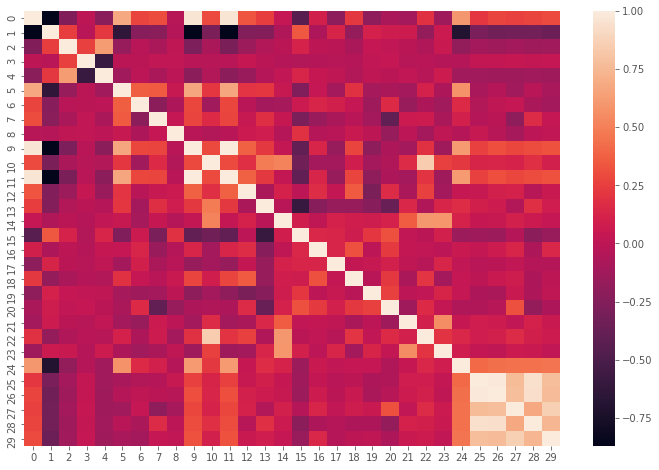

In [647]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [648]:
def corr_func_new(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [649]:
corr_features2 = corr_func_new(X_train_unique, 0.501)
print(corr_features2)
print(len(corr_features2))

{1, 4, 5, 9, 11, 14, 15, 22, 23, 24, 26, 27, 28, 29}
14


In [327]:
X_train_uncorr = X_train_unique.drop(labels=corr_features2, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features2, axis = 1)

In [330]:
print(len(X_train_uncorr.columns))

15


In [328]:
X_train_uncorr

,0,2,3,6,7,8,10,12,16,17,18,19,20,21,25
0,0.263013,1153.514140,1459.032197,-3.2,0.4,6.8033,-10.626400,-0.925900,-9.387300,-4.809600,-2.152600,3.034700,-2.48760,6.070500,7.2
1,0.863782,175.427351,3066.285017,2.9,-1.4,-1.6670,6.342500,1.753400,0.412200,-1.635300,0.009500,1.026400,2.68440,3.484200,-2.4
2,0.806662,521.586416,2043.141817,0.0,0.0,-5.8225,3.532935,1.998815,-2.752634,-5.021582,-0.980558,1.103122,-2.18624,-2.092153,65.3
3,0.961452,320.758638,1046.298588,3.3,4.1,-2.9368,13.760000,1.815100,2.550100,-5.859900,-0.369400,-2.715500,-18.16340,-15.166300,0.0
4,0.384297,1398.594156,791.211807,-1.3,-1.5,0.2892,5.801800,-0.032900,-8.111100,-0.945300,-0.811000,1.940200,-4.56050,-0.626900,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.853371,179.178059,1343.079957,-1.6,5.5,7.0680,4.422000,6.410300,4.240800,3.329000,11.121200,3.890800,8.82630,-2.367200,0.0
885,0.720134,1091.992815,767.895180,2.1,4.9,0.0054,3.080600,0.188900,-3.038000,3.085800,1.945400,-2.417000,-1.70270,-1.513900,0.0
886,0.628777,259.742239,310.824901,0.0,0.0,-2.1699,-0.729700,0.817400,-3.235700,3.417700,-2.343900,-0.130300,-3.53050,11.081400,67.2
887,0.540032,1263.984722,1702.339131,2.6,-3.0,-3.6000,8.114557,2.441230,-5.843533,-1.054987,2.177787,1.159451,15.99627,-2.068781,-4.2


In [319]:
x_new2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 1111
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   team1_log5                    1112 non-null   float64
 1   seed_diff                     1112 non-null   int64  
 2   dist1                         1112 non-null   float64
 3   dist2                         1112 non-null   float64
 4   diff_dist                     1112 non-null   float64
 5   srs_diff                      1112 non-null   float64
 6   TOV_diff                      1112 non-null   float64
 7   TS_diff                       1112 non-null   float64
 8   TRB_diff                      1112 non-null   float64
 9   eFG_diff                      1112 non-null   float64
 10  adjtempo_diff                 1112 non-null   float64
 11  net_rating_diff               1112 non-null   float64
 12  ast_stl_block_diff            1112 non-null   float64
 13  win

In [336]:
X_train_uncorr.shape, X_test_uncorr.shape


((889, 15), (223, 15))

In [241]:
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)


Accuracy on test set: 
1.0


In [277]:
y_train

629     1
768     1
1022    1
449     1
401     1
       ..
237     1
112     1
565     1
1057    1
142     1
Name: team1_win, Length: 889, dtype: int64

In [242]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,-0.874805,-0.268372,0.018151,-0.233273,0.681644,0.226236,0.293797,0.044319,0.966606,...,-0.058653,-0.134647,0.196424,-0.144225,0.604960,0.213411,0.262546,0.262147,0.259511,0.302125
1,-0.874805,1.000000,0.236364,-0.012314,0.202464,-0.640283,-0.176089,-0.223300,-0.095938,-0.863472,...,0.075977,0.092240,-0.159347,0.079323,-0.703295,-0.264833,-0.298146,-0.311129,-0.288342,-0.360694
2,-0.268372,0.236364,1.000000,0.244716,0.615254,-0.156241,-0.048095,-0.032089,0.007290,-0.280004,...,-0.034526,0.041345,-0.050353,0.085554,-0.155736,-0.090477,-0.100375,-0.095846,-0.115626,-0.089781
3,0.018151,-0.012314,0.244716,1.000000,-0.613796,-0.020968,-0.022231,0.048231,0.001463,-0.004923,...,0.028226,0.010515,-0.001392,0.010411,-0.055204,0.047590,0.050655,0.058100,0.036455,0.034698
4,-0.233273,0.202464,0.615254,-0.613796,1.000000,-0.110167,-0.021085,-0.065342,0.004747,-0.223983,...,-0.051061,0.025115,-0.039867,0.061196,-0.081921,-0.112362,-0.122912,-0.125278,-0.123785,-0.101313
5,0.681644,-0.640283,-0.156241,-0.020968,-0.110167,1.000000,0.325732,0.333966,0.157073,0.683970,...,-0.074271,-0.139397,0.093731,-0.108447,0.589061,-0.079808,-0.041138,-0.133076,-0.024961,-0.093641
6,0.226236,-0.176089,-0.048095,-0.022231,-0.021085,0.325732,1.000000,-0.213730,0.020893,0.248232,...,0.093001,-0.218013,-0.100090,-0.142443,0.112349,-0.041553,0.002728,-0.003725,-0.080003,-0.102938
7,0.293797,-0.223300,-0.032089,0.048231,-0.065342,0.333966,-0.213730,1.000000,0.030973,0.266811,...,-0.341990,0.057058,0.092426,-0.086659,0.084604,-0.027905,-0.009822,-0.173706,0.124151,0.011669
8,0.044319,-0.095938,0.007290,0.001463,0.004747,0.157073,0.020893,0.030973,1.000000,0.042945,...,-0.187518,0.009825,-0.091775,0.042649,0.061357,0.027176,-0.031791,-0.113792,-0.016851,-0.014318
9,0.966606,-0.863472,-0.280004,-0.004923,-0.223983,0.683970,0.248232,0.266811,0.042945,1.000000,...,-0.040930,-0.146529,0.207107,-0.147525,0.622156,0.228090,0.280586,0.277835,0.269081,0.313440


In [337]:
corrdata = corrmat.abs().stack()
corrdata

0   0     1.000000
    1     0.874805
    2     0.268372
    3     0.018151
    4     0.233273
            ...   
29  25    0.683557
    26    0.678424
    27    0.855954
    28    0.653280
    29    1.000000
Length: 900, dtype: float64

In [245]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

29  29    1.000000
14  14    1.000000
26  26    1.000000
25  25    1.000000
24  24    1.000000
            ...   
19  3     0.000682
7   18    0.000587
18  7     0.000587
8   17    0.000041
17  8     0.000041
Length: 900, dtype: float64

In [251]:
corrdata2 = corrdata[corrdata>0.6]
corrdata2 = corrdata[corrdata<1]
corrdata2

11  9     0.999192
9   11    0.999192
25  26    0.987915
26  25    0.987915
9   0     0.966606
0   9     0.966606
11  0     0.965223
0   11    0.965223
25  28    0.950821
28  25    0.950821
    26    0.946727
26  28    0.946727
1   0     0.874805
0   1     0.874805
9   1     0.863472
1   9     0.863472
    11    0.862937
11  1     0.862937
27  29    0.855954
29  27    0.855954
dtype: float64

In [338]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value
0,0,0,1.000000
1,0,1,0.874805
2,0,2,0.268372
3,0,3,0.018151
4,0,4,0.233273
...,...,...,...
895,29,25,0.683557
896,29,26,0.678424
897,29,27,0.855954
898,29,28,0.653280


In [253]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [254]:
len(correlated_groups_list)

3

In [255]:
X_train.shape, X_train_uncorr.shape

((889, 34), (889, 18))

In [256]:
for group in correlated_groups_list:
    print(group)

    features1  features2  corr_value
0          11          9    0.999192
6          11          0    0.965223
17         11          1    0.862937
   features1  features2  corr_value
2         25         26    0.987915
8         25         28    0.950821
    features1  features2  corr_value
18         27         29    0.855954


In [262]:
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [263]:
important_features

[features      11.0
 importance     0.0
 Name: 0, dtype: float64,
 features      25.0
 importance     0.0
 Name: 0, dtype: float64,
 features      27.0
 importance     0.0
 Name: 0, dtype: float64]

In [ ]:
X_train_uncorr,y_train

## Percentile Feature Selection

In [182]:
x_all, y_new = shuffle(X,Y,random_state = 0)

n_samples2, n_features2 = x_all.shape
print("n_samples=%d" % n_samples2)
print("n_features=%d" % n_features2)

n_samples=1112
n_features=153


In [269]:
selector3 = SelectPercentile(percentile = 10)
X_train_fs3 = selector3.fit_transform(X = x_new2,y = y_new2)
feature_names3 = x_new2.columns.tolist()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [311]:
allfeaturesByScore = [feature_names3[i] for i in np.argsort(selector3.scores_)[::-1]]
selected_columns_index = np.argsort(selector3.scores_)[::-1].tolist()[:30]
allfeaturesByScore[:34]


['diff_ftoverfgArate',
 'TRB_diff',
 'diff_stlrate',
 'win_tempo_diff',
 'ast_stl_block_diff',
 'net_rating_diff',
 'adjtempo_diff',
 'eFG_diff',
 'TS_diff',
 'diff_ORB',
 'TOV_diff',
 'srs_diff',
 'diff_dist',
 'dist2',
 'dist1',
 'seed_diff',
 'diff_fg2pct',
 'diff_blockpct',
 'diff_team2AstVsteam1givenAst',
 'diff_oppfg2pct',
 'diff_ftrate',
 'diff_oppfg3pct',
 'diff_fg3pct',
 'diff_oppblockpct',
 'diff_f3grate',
 'diff_oppf3grate',
 'diff_Arate',
 'diff_opparate',
 'diff_oppstlrate',
 'diff_SOS',
 'diff_pace',
 'diff_ORtg',
 'diff_3PAr',
 'team1_log5']

## Logit Model With Top 10 Features

In [223]:

training_columns_top = ['game_id','season','team1_win','exp_win1','exp_win2','team2_score',
                                    'team1_score','team1_log5','team1_id','team2_id','seed_diff','diff_ftoverfgArate','TRB_diff',
'diff_stlrate',
'win_tempo_diff',
'ast_stl_block_diff',
'net_rating_diff',
'adjtempo_diff',
'eFG_diff',
'TS_diff',
'diff_ORB', 'srs_diff', 'TOV_diff', 'diff_blockpct', 'diff_oppfg3pct', 'diff_fg3pct', 'diff_oppf3grate']

mm_data_4 = ncaa_data_new2.sample(frac=.5, random_state=15)[training_columns_top]
mm_data_5 = ncaa_data_new2[~ncaa_data_new2.index.isin(mm_data_4.index)][training_columns_top].reset_index(drop=True)
mm_data_4 = mm_data_4.reset_index(drop=True)

In [224]:
mm_data_5['team1_win'] = 0

mm_data_5['team1_log5'] = 1-mm_data_5['team1_log5']
mm_data_5['game_id'] = (mm_data_5['game_id'].str.split('-', expand=True)[0] 
                           + '-' + mm_data_5['game_id'].str.split('-', expand=True)[2] 
                           + '-' + mm_data_5['game_id'].str.split('-', expand=True)[1]
                           ) 
mm_data_5['seed_diff'] = mm_data_5['seed_diff']*-1
mm_data_5['diff_ftoverfgArate'] = mm_data_5['diff_ftoverfgArate']*-1
mm_data_5['TRB_diff'] = mm_data_5['TRB_diff']*-1
mm_data_5['diff_stlrate'] = mm_data_5['diff_stlrate']*-1
mm_data_5['win_tempo_diff'] = mm_data_5['win_tempo_diff']*-1
mm_data_5['ast_stl_block_diff'] = mm_data_5['ast_stl_block_diff']*-1
mm_data_5['net_rating_diff'] = mm_data_5['net_rating_diff']*-1
mm_data_5['adjtempo_diff'] = mm_data_5['adjtempo_diff']*-1
mm_data_5['eFG_diff'] = mm_data_5['eFG_diff']*-1
mm_data_5['TS_diff'] = mm_data_5['TS_diff']*-1
mm_data_5['diff_ORB'] = mm_data_5['diff_ORB']*-1
mm_data_5['srs_diff'] = mm_data_5['srs_diff']*-1
mm_data_5['TOV_diff'] = mm_data_5['TOV_diff']*-1
mm_data_5['diff_blockpct'] = mm_data_5['diff_blockpct']*-1
mm_data_5['diff_oppfg3pct'] = mm_data_5['diff_oppfg3pct']*-1
mm_data_5['diff_fg3pct'] = mm_data_5['diff_fg3pct']*-1
mm_data_5['diff_oppf3grate'] = mm_data_5['diff_oppf3grate']*-1

'diff_ftoverfgArate'

mm_data_5.columns = ['game_id', 'season', 'team1_win', 'exp_win2', 'exp_win1', 'team1_score', 'team2_score', 'team1_log5',
 'team2_id', 'team1_id','seed_diff','diff_ftoverfgArate','TRB_diff','diff_stlrate',
'win_tempo_diff',
'ast_stl_block_diff',
'net_rating_diff',
'adjtempo_diff',
'eFG_diff',
'TS_diff',
'diff_ORB', 'srs_diff', 'TOV_diff', 'diff_blockpct', 'diff_oppfg3pct', 'diff_fg3pct', 'diff_oppf3grate']



In [ ]:


mm_train = pd.concat([mm_data_5, mm_data_4]).reset_index(drop=True)
train, test = train_test_split(mm_train, train_size=.75)
#train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)

col_to_norm_df22 =[134, 135, 136, 137, 138, 139, 140]

list= []
for i in col_to_norm_train:
    list.append(df_22.columns.tolist()[i])
X_to_normalize = df_22.iloc[:,col_to_norm_df22]
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_to_normalize)
df_22.iloc[:,col_to_norm_df22]=X_normalized

In [137]:
mm_data_5.describe()

,season,team1_win,exp_win2,exp_win1,team1_score,team2_score,team1_log5,team2_id,team1_id,seed_diff,...,adjtempo_diff,eFG_diff,TS_diff,diff_ORB,srs_diff,TOV_diff,diff_blockpct,diff_oppfg3pct,diff_fg3pct,diff_oppf3grate
count,556.000000,556.0,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,2009.989209,0.0,0.876248,0.783073,63.933453,75.214029,0.378686,1296.309353,1296.106115,3.762590,...,-0.196789,-0.004718,-0.004412,-2.166547,-3.946475,-0.278417,-0.853956,0.481594,-0.525342,-0.018996
std,4.910723,0.0,0.089158,0.155907,10.577261,10.580752,0.205079,99.020853,106.189977,6.499711,...,4.432454,0.031337,0.028928,12.257384,8.317422,1.839340,4.298452,2.883780,3.612928,4.975125
min,2002.000000,0.0,0.214118,0.197019,29.000000,47.000000,0.009786,1104.000000,1102.000000,-13.000000,...,-19.116500,-0.133000,-0.113000,-40.400000,-36.970000,-6.500000,-13.104500,-8.648500,-12.029900,-15.366200
25%,2006.000000,0.0,0.849835,0.729519,57.000000,68.000000,0.209034,1228.000000,1211.000000,-1.000000,...,-3.018200,-0.022000,-0.021000,-2.425000,-7.757500,-1.300000,-3.651547,-1.458200,-2.908825,-3.222575
50%,2010.000000,0.0,0.900263,0.829255,63.000000,75.000000,0.377050,1282.500000,1301.000000,3.000000,...,-0.303500,-0.000000,-0.000000,-0.000000,-0.615000,-0.000000,-0.856750,0.469350,-0.501800,-0.213300
75%,2014.000000,0.0,0.931921,0.889508,71.000000,82.000000,0.526480,1390.000000,1390.500000,8.250000,...,2.680375,0.007000,0.007000,-0.000000,-0.000000,0.600000,2.056975,2.496950,1.869150,3.291385
max,2018.000000,0.0,0.978741,0.978741,105.000000,112.000000,0.947455,1462.000000,1462.000000,15.000000,...,13.933200,0.097000,0.091000,41.900000,23.450000,5.000000,11.748800,9.290500,11.566600,12.917200


In [225]:
mm_train = pd.concat([mm_data_5, mm_data_4]).reset_index(drop=True)
train, test = train_test_split(mm_train, train_size=.75)
#train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)

In [226]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [129]:
train.describe()

,season,team1_win,exp_win2,exp_win1,team1_score,team2_score,team1_log5,team2_id,team1_id,seed_diff,...,adjtempo_diff,eFG_diff,TS_diff,diff_ORB,srs_diff,TOV_diff,diff_blockpct,diff_oppfg3pct,diff_fg3pct,diff_oppf3grate
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,...,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,2010.057841,0.502571,0.827810,0.826341,69.847044,69.466581,0.625123,1295.397172,1292.296915,-3.832905,...,0.010117,0.003960,0.003420,2.611183,4.079319,0.469280,0.786955,-0.393178,0.496489,-0.400656
std,4.977219,0.500315,0.133159,0.140862,12.010227,11.874918,0.202325,101.754646,106.098036,6.470235,...,4.289324,0.031606,0.029034,12.136168,7.869395,1.756545,4.415642,3.011926,3.743391,5.182796
min,2002.000000,0.000000,0.246607,0.206722,35.000000,34.000000,0.060956,1102.000000,1103.000000,-15.000000,...,-13.933200,-0.100000,-0.089000,-41.900000,-18.560000,-5.300000,-11.982200,-9.290500,-11.566600,-17.469500
25%,2006.000000,0.000000,0.803299,0.800196,62.000000,61.000000,0.484599,1211.000000,1207.000000,-8.000000,...,-2.583500,-0.009000,-0.009000,0.000000,0.000000,-0.200000,-2.148801,-2.580825,-2.026400,-3.826175
50%,2010.000000,1.000000,0.867679,0.867513,70.000000,69.000000,0.628556,1292.000000,1279.500000,-4.000000,...,-0.023250,0.000000,0.000000,0.000000,1.415000,0.000000,0.701013,-0.367600,0.397350,-0.353700
75%,2015.000000,1.000000,0.916070,0.916399,77.000000,78.000000,0.785142,1390.000000,1393.000000,1.000000,...,2.548975,0.020000,0.018000,2.775000,7.405000,1.500000,3.826525,1.820680,2.939100,2.904113
max,2018.000000,1.000000,0.978741,0.978741,121.000000,112.000000,0.990214,1463.000000,1462.000000,15.000000,...,15.362900,0.133000,0.119000,41.300000,36.970000,6.800000,13.104500,8.648500,13.456700,15.262600


In [ ]:
X_flip=train[['team1_log5','TRB_diff','diff_stlrate','win_tempo_diff',
'net_rating_diff',
'diff_ORB', 'TOV_diff']]
y_flip = train['team1_win']

In [227]:
col_to_norm_train =[7, 10, 12, 14, 16, 21, 22, 23, 24, 25, 26]

list= []
for i in col_to_norm_train:
    list.append(train.columns.tolist()[i])
X_to_normalize = train.iloc[:,col_to_norm_train]
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_to_normalize)
train.iloc[:,col_to_norm_train]=X_normalized

In [228]:
col_to_norm_test =[7, 10, 12, 14, 16, 21, 22, 23, 24, 25, 26]

list= []
for i in col_to_norm_test:
    list.append(test.columns.tolist()[i])
X_to_normalize = test.iloc[:,col_to_norm_test]
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_to_normalize)
test.iloc[:,col_to_norm_test]=X_normalized

In [822]:
train.describe()

,season,team1_win,exp_win2,exp_win1,team1_score,team2_score,team1_log5,team2_id,team1_id,seed_diff,...,adjtempo_diff,eFG_diff,TS_diff,diff_ORB,srs_diff,TOV_diff,diff_blockpct,diff_oppfg3pct,diff_fg3pct,diff_oppf3grate
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,...,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2010.075366,0.497188,0.829547,0.827296,69.614173,69.63892,0.503222,1294.986502,1295.434196,-0.028121,...,-0.132090,-0.000828,-0.001132,0.345782,0.511132,0.496570,0.494890,0.499581,0.465486,0.563603
std,4.927395,0.500274,0.129055,0.135736,12.091741,11.63179,0.238938,102.062723,105.198420,7.462843,...,4.360313,0.031431,0.028994,12.674191,0.118832,0.140451,0.169608,0.164052,0.144840,0.163228
min,2002.000000,0.000000,0.219427,0.197019,29.000000,37.00000,0.000000,1102.000000,1102.000000,-15.000000,...,-19.116500,-0.102000,-0.095000,-40.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.801787,0.800062,61.000000,61.00000,0.333507,1211.000000,1211.000000,-5.000000,...,-2.794800,-0.017000,-0.016000,0.000000,0.467110,0.428571,0.386690,0.389843,0.372621,0.456627
50%,2010.000000,0.000000,0.865087,0.867332,70.000000,69.00000,0.505125,1290.000000,1280.000000,0.000000,...,-0.273900,-0.000000,0.000000,0.000000,0.509209,0.488722,0.488780,0.500813,0.461662,0.566442
75%,2014.000000,1.000000,0.914781,0.915055,77.000000,78.00000,0.679966,1390.000000,1395.000000,5.000000,...,2.501300,0.014000,0.011000,0.800000,0.561834,0.571429,0.605971,0.613354,0.557457,0.673076
max,2018.000000,1.000000,0.978741,0.978741,121.000000,105.00000,1.000000,1463.000000,1463.000000,15.000000,...,14.735600,0.120000,0.119000,41.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [229]:
corr_data_norm = train.corr()

In [1]:
corrdata_norm = corr_data_norm['team1_win'].sort_values(ascending=False)
df_corrdata_norm = pd.DataFrame(corrdata_norm)
df_corrdata_norm

NameError: name 'corr_data_norm' is not defined

In [833]:
train.describe()

,season,team1_win,exp_win2,exp_win1,team1_score,team2_score,team1_log5,team2_id,team1_id,seed_diff,...,adjtempo_diff,eFG_diff,TS_diff,diff_ORB,srs_diff,TOV_diff,diff_blockpct,diff_oppfg3pct,diff_fg3pct,diff_oppf3grate
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,...,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2010.075366,0.497188,0.829547,0.827296,69.614173,69.63892,0.503222,1294.986502,1295.434196,-0.028121,...,-0.132090,-0.000828,-0.001132,0.345782,0.511132,0.496570,0.494890,0.499581,0.465486,0.563603
std,4.927395,0.500274,0.129055,0.135736,12.091741,11.63179,0.238938,102.062723,105.198420,7.462843,...,4.360313,0.031431,0.028994,12.674191,0.118832,0.140451,0.169608,0.164052,0.144840,0.163228
min,2002.000000,0.000000,0.219427,0.197019,29.000000,37.00000,0.000000,1102.000000,1102.000000,-15.000000,...,-19.116500,-0.102000,-0.095000,-40.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.801787,0.800062,61.000000,61.00000,0.333507,1211.000000,1211.000000,-5.000000,...,-2.794800,-0.017000,-0.016000,0.000000,0.467110,0.428571,0.386690,0.389843,0.372621,0.456627
50%,2010.000000,0.000000,0.865087,0.867332,70.000000,69.00000,0.505125,1290.000000,1280.000000,0.000000,...,-0.273900,-0.000000,0.000000,0.000000,0.509209,0.488722,0.488780,0.500813,0.461662,0.566442
75%,2014.000000,1.000000,0.914781,0.915055,77.000000,78.00000,0.679966,1390.000000,1395.000000,5.000000,...,2.501300,0.014000,0.011000,0.800000,0.561834,0.571429,0.605971,0.613354,0.557457,0.673076
max,2018.000000,1.000000,0.978741,0.978741,121.000000,105.00000,1.000000,1463.000000,1463.000000,15.000000,...,14.735600,0.120000,0.119000,41.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Best Logit model


In [124]:
train.describe()

,season,team1_win,exp_win2,exp_win1,team1_score,team2_score,team1_log5,team2_id,team1_id,seed_diff,...,adjtempo_diff,eFG_diff,TS_diff,diff_ORB,srs_diff,TOV_diff,diff_blockpct,diff_oppfg3pct,diff_fg3pct,diff_oppf3grate
count,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,...,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000
mean,2010.033573,0.503597,0.829142,0.821392,69.829736,69.874101,0.497554,1298.437650,1293.377698,0.505316,...,-0.100566,-0.000001,-0.000149,-0.087170,0.509683,0.493410,0.475923,0.501431,0.471861,0.541476
std,4.912079,0.500287,0.130937,0.144630,12.159495,11.690270,0.244316,102.170322,105.778268,0.250159,...,4.412753,0.031566,0.029091,12.352186,0.122431,0.140361,0.161252,0.163307,0.143410,0.174419
min,2002.000000,0.000000,0.246607,0.197019,29.000000,37.000000,0.000000,1102.000000,1102.000000,0.000000,...,-19.116500,-0.133000,-0.113000,-40.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.800236,0.796329,62.000000,61.250000,0.315961,1228.000000,1211.000000,0.333333,...,-2.726375,-0.016000,-0.015000,0.000000,0.465725,0.428571,0.373430,0.388268,0.380358,0.428016
50%,2010.000000,1.000000,0.867347,0.863019,70.000000,70.000000,0.497024,1301.000000,1278.500000,0.500000,...,-0.142600,0.000000,-0.000000,0.000000,0.509209,0.488722,0.476511,0.501996,0.464413,0.543146
75%,2014.000000,1.000000,0.915003,0.914913,77.000000,78.000000,0.681712,1393.000000,1393.000000,0.666667,...,2.614275,0.014000,0.012750,0.400000,0.559202,0.563910,0.582024,0.616887,0.563930,0.659429
max,2018.000000,1.000000,0.978741,0.978741,121.000000,112.000000,1.000000,1462.000000,1463.000000,1.000000,...,14.735600,0.120000,0.119000,41.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [231]:
logit = LogisticRegression()
logit.fit(X=train[['team1_log5','net_rating_diff', 'srs_diff','diff_oppfg3pct',
'diff_blockpct']], y=train['team1_win'])

seed_smlogit = smf.logit("team1_win ~ team1_log5 + net_rating_diff + srs_diff + diff_oppfg3pct + diff_blockpct", train).fit()
seed_smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.539329
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  834
Model:                          Logit   Df Residuals:                      828
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                  0.2218
Time:                        11:42:55   Log-Likelihood:                -449.80
converged:                       True   LL-Null:                       -577.97
Covariance Type:            nonrobust   LLR p-value:                 2.405e-53
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.2441      1.545     -5.336      0.000     -11.272      -5.216
team1_log5         -4.4474      2.824     -1.575      0.115      -9.982       1.087
net_rating_diff    12.9954      4.954      2.623      0.009       3.285      22.705
srs_diff            7.5834      1.565      4.845      0.000       4.516      10.651
diff_oppfg3pct     -0.9122      0.525     -1.738      0.082      -1.941       0.117
diff_blockpct       0.1975      0.536      0.369      0.712      -0.853       1.248
===================================================================================
"""

In [812]:
#seed_smlogit = smf.logit("team1_win ~ team1_log5 + seed_diff + win_tempo_diff + srs_diff + TRB_diff + TOV_diff + net_rating_diff", train).fit()
#seed_smlogit.summary()

In [232]:
test['prob'] = logit.predict_proba(test[['team1_log5','net_rating_diff', 'srs_diff','diff_oppfg3pct', 'diff_blockpct']])[:,1]
                              
                                   
test['prediction'] = logit.predict(test[['team1_log5','net_rating_diff', 'srs_diff','diff_oppfg3pct', 'diff_blockpct']])                                 



In [233]:
accuracy_score(test['team1_win'], test['prediction'])
#log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])

0.737410071942446

In [234]:
log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])


0.5074004087268144

In [158]:
test[['game_id','prob']]

,game_id,prob
0,2003-1409-1173,0.348829
1,2016-1338-1458,0.438443
2,2009-1163-1151,0.960930
3,2002-1423-1231,0.149560
4,2018-1243-1260,0.241963
...,...,...
273,2014-1166-1124,0.546223
274,2008-1272-1417,0.471051
275,2016-1314-1344,0.792541
276,2005-1181-1277,0.550438


## Creating 2022 predictions 

In [119]:
pwd

example_submission = pd.read_csv('allseasonsplus2019.csv').query("season==2019").reset_index(drop=True)


'/Users/brianrochford/Downloads'

In [251]:
df_22 = pd.read_csv('allseasonsplus2019.csv').query("season==2019")

In [909]:
df_22

,game_id,team1_id,team2_id,season,team1_seed,team2_seed,team1_position,team2_position,strongseed,weakseed,...,team2_3PAr,team2_TS%,team2_TRB%,team2_AST%,team2_STL%,team2_BLK%,team2_eFG%,team2_TOV%,team2_ORB%,team2_FT/FGA
0,2022-1124-1246,1124,1246,2022,1,2,W01,W02,1,2,...,0.280,0.560,57.1,52.9,9.8,11.0,0.534,14.0,37.9,0.198
1,2022-1124-1345,1124,1345,2022,1,3,W01,W03,1,3,...,0.391,0.595,57.0,58.9,6.9,9.9,0.570,14.8,35.2,0.255
2,2022-1124-1417,1124,1417,2022,1,4,W01,W04,1,4,...,0.315,0.539,52.8,50.0,10.3,9.6,0.506,11.4,32.0,0.220
3,2022-1124-1388,1124,1388,2022,1,5,W01,W05,1,5,...,0.362,0.555,53.3,51.4,10.7,6.7,0.527,15.3,27.8,0.182
4,2022-1124-1400,1124,1400,2022,1,6,W01,W06,1,6,...,0.360,0.538,51.1,53.6,11.9,10.1,0.500,15.7,31.8,0.242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2022-1436-1168,1436,1168,2022,13,15,Z13,Z15,13,15,...,0.302,0.542,51.3,45.6,10.8,5.8,0.497,15.9,29.7,0.274
2274,2022-1436-1209,1436,1209,2022,13,16,Z13,Z16,13,16,...,0.377,0.500,51.0,54.2,12.9,13.0,0.465,14.4,34.3,0.210
2275,2022-1286-1168,1286,1168,2022,14,15,Z14,Z15,14,15,...,0.302,0.542,51.3,45.6,10.8,5.8,0.497,15.9,29.7,0.274
2276,2022-1286-1209,1286,1209,2022,14,16,Z14,Z16,14,16,...,0.377,0.500,51.0,54.2,12.9,13.0,0.465,14.4,34.3,0.210


In [ ]:
'team1_log5','net_rating_diff', 'srs_diff','diff_oppfg3pct', 'diff_blockpct'

In [252]:
df_22['exp_win1'] = (df_22['team1_adjoe']**11.5)/ ((df_22['team1_adjde']**11.5)+(df_22['team1_adjoe']**11.5))
df_22['exp_win2'] = (df_22['team2_adjoe']**11.5)/ ((df_22['team2_adjde']**11.5)+(df_22['team2_adjoe']**11.5))



df_22['team1_log5'] = (df_22['exp_win1'] - (df_22['exp_win1']*df_22['exp_win2']))/ (df_22['exp_win1']+df_22['exp_win2']-(2*df_22['exp_win1']*df_22['exp_win2']))

df_22['seed_diff'] = df_22['team1_seed'] - df_22['team2_seed']
df_22['srs_diff'] = df_22['team1_SRS'] - df_22['team2_SRS']
df_22['TOV_diff'] =  df_22['team2_TOV%']- df_22['team1_TOV%']
df_22['net_rating_diff'] = (df_22['team1_adjoe'] - df_22['team1_adjde']) - (df_22['team2_adjoe'] - df_22['team2_adjde'])


df_22['diff_oppfg3pct'] = df_22['team1_oppfg3pct'] - df_22['team2_oppfg3pct']
df_22['diff_blockpct'] = df_22['team1_blockpct'] - df_22['team2_blockpct']

In [257]:
#mm_data_5['team1_win'] = 0

df_22['team1_log5'] = 1-df_22['team1_log5']


df_22['seed_diff'] = df_22['seed_diff']*-1


df_22['net_rating_diff'] = df_22['net_rating_diff']*-1
#mm_data_5['adjtempo_diff'] = mm_data_5['adjtempo_diff']*-1
#mm_data_5['eFG_diff'] = mm_data_5['eFG_diff']*-1
#mm_data_5['TS_diff'] = mm_data_5['TS_diff']*-1
#mm_data_5['diff_ORB'] = mm_data_5['diff_ORB']*-1
df_22['srs_diff'] = df_22['srs_diff']*-1
#mm_data_5['TOV_diff'] = mm_data_5['TOV_diff']*-1
df_22['diff_blockpct'] = df_22['diff_blockpct']*-1
df_22['diff_oppfg3pct'] = df_22['diff_oppfg3pct']*-1

In [164]:

training_columns_top4 = ['game_id','season','exp_win1','exp_win2','team1_log5','team1_id','team2_id','seed_diff',
'net_rating_diff',
'srs_diff', 'TOV_diff', 'diff_blockpct', 'diff_oppfg3pct']

mm_data_6 = df_22.sample(frac=.5, random_state=15)[training_columns_top4]
mm_data_7 = df_22[~df_22.index.isin(mm_data_6.index)][training_columns_top4].reset_index(drop=True)
mm_data_6 = mm_data_6.reset_index(drop=True)

In [165]:
#mm_data_5['team1_win'] = 0

mm_data_7['team1_log5'] = 1-mm_data_7['team1_log5']
mm_data_7['game_id'] = (mm_data_7['game_id'].str.split('-', expand=True)[0] 
                           + '-' + mm_data_7['game_id'].str.split('-', expand=True)[2] 
                           + '-' + mm_data_7['game_id'].str.split('-', expand=True)[1]
                           ) 
mm_data_7['seed_diff'] = mm_data_7['seed_diff']*-1
mm_data_7['net_rating_diff'] = mm_data_7['net_rating_diff']*-1
mm_data_7['srs_diff'] = mm_data_7['srs_diff']*-1
mm_data_7['TOV_diff'] = mm_data_7['TOV_diff']*-1
mm_data_7['diff_blockpct'] = mm_data_7['diff_blockpct']*-1
mm_data_7['diff_oppfg3pct'] = mm_data_7['diff_oppfg3pct']*-1


#'diff_ftoverfgArate'

mm_data_7.columns = ['game_id','season','exp_win1','exp_win2','team1_log5','team1_id','team2_id','seed_diff',
'net_rating_diff',
'srs_diff', 'TOV_diff', 'diff_blockpct', 'diff_oppfg3pct']

In [915]:
mm_train2 = pd.concat([mm_data_7, mm_data_6]).reset_index(drop=True)
train2, test2 = train_test_split(mm_train2, train_size=.75)
train2 = train.reset_index(drop=True)
test2 = test.reset_index(drop=True)

In [258]:
df_22.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 144 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   team1_id                        int64  
 1   team1_score                     int64  
 2   team2_id                        int64  
 3   team2_score                     int64  
 4   WLoc                            object 
 5   num_ot                          int64  
 6   team1_position                  object 
 7   team2_position                  object 
 8   team1_seed                      int64  
 9   team2_seed                      int64  
 10  strongseed                      int64  
 11  weakseed                        int64  
 12  team1_region                    object 
 13  team2_region                    object 
 14  slot                            object 
 15  team1_teamname                  object 
 16  team2_teamname                  object 
 17  season                          int6

In [ ]:
df_22['exp_win1'] = (df_22['team1_adjoe']**11.5)/ ((df_22['team1_adjde']**11.5)+(df_22['team1_adjoe']**11.5))
df_22['exp_win2'] = (df_22['team2_adjoe']**11.5)/ ((df_22['team2_adjde']**11.5)+(df_22['team2_adjoe']**11.5))



df_22['team1_log5'] = (df_22['exp_win1'] - (df_22['exp_win1']*df_22['exp_win2']))/ (df_22['exp_win1']+df_22['exp_win2']-(2*df_22['exp_win1']*df_22['exp_win2']))

In [259]:


col_to_norm_df22 =[136, 137, 138, 137, 139, 140, 141, 142]

list= []
for i in col_to_norm_train:
    list.append(df_22.columns.tolist()[i])
X_to_normalize = df_22.iloc[:,col_to_norm_df22]
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_to_normalize)
df_22.iloc[:,col_to_norm_df22]=X_normalized

In [261]:
df_22.describe()

,team1_id,team1_score,team2_id,team2_score,num_ot,team1_seed,team2_seed,strongseed,weakseed,season,...,exp_win1,exp_win2,team1_log5,seed_diff,srs_diff,TOV_diff,net_rating_diff,diff_oppfg3pct,diff_blockpct,prob
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,1293.104478,76.358209,1292.194030,63.880597,0.044776,4.910448,8.910448,3.985075,9.835821,2019.0,...,0.903527,0.794185,0.407861,0.541667,0.593857,0.480560,0.592753,0.543144,0.498627,0.206785
std,104.789274,9.613282,100.083032,10.249202,0.208373,4.140456,4.634297,3.453117,4.176402,0.0,...,0.106590,0.170557,0.280077,0.258484,0.215715,0.238341,0.244909,0.206949,0.217501,0.326279
min,1113.000000,53.000000,1101.000000,44.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2019.0,...,0.389061,0.208404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000182
25%,1211.000000,70.000000,1227.500000,56.500000,0.000000,2.000000,5.000000,1.500000,6.000000,2019.0,...,0.885785,0.723201,0.172002,0.333333,0.473861,0.296296,0.435847,0.372939,0.343136,0.004071
50%,1277.000000,77.000000,1285.000000,63.000000,0.000000,3.000000,9.000000,3.000000,10.000000,2019.0,...,0.934524,0.851047,0.357248,0.500000,0.605564,0.506173,0.600017,0.539146,0.485416,0.034696
75%,1403.000000,83.000000,1386.000000,72.500000,0.000000,8.000000,13.000000,5.500000,13.000000,2019.0,...,0.967555,0.911622,0.645335,0.708333,0.743998,0.648148,0.783682,0.681250,0.634606,0.261750
max,1459.000000,99.000000,1463.000000,94.000000,1.000000,16.000000,16.000000,16.000000,16.000000,2019.0,...,0.980355,0.972195,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999565


In [ ]:
[['team1_log5','net_rating_diff', 'srs_diff','diff_oppfg3pct',
'diff_blockpct', 'seed_diff']]

In [262]:
df_22['prob'] = seed_smlogit.predict(df_22[['team1_log5','net_rating_diff', 'srs_diff','diff_oppfg3pct',
'diff_blockpct']])




In [263]:
df_22['prob']

0     0.988415
1     0.980524
2     0.922313
3     0.977960
4     0.997859
        ...   
62    0.905019
63    0.993882
64    0.995987
65    0.814671
66    0.929457
Name: prob, Length: 67, dtype: float64

In [264]:
df_22[['game_id','prob', 'team1_teamname', 'team2_teamname']].to_csv("2022_logit_predictions_no_seed_diff_new23.csv", index=False)




In [ ]:
#Step by step eliminating most correlated vars with team1_win starting at 9

In [786]:
logit = LogisticRegression()
logit.fit(X=train[['team1_log5','seed_diff','net_rating_diff', 'srs_diff','TOV_diff',
'diff_blockpct', 'diff_oppfg3pct']], y=train['team1_win'])



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [787]:
seed_smlogit2 = smf.logit("team1_win ~ team1_log5 + seed_diff + net_rating_diff + srs_diff + TOV_diff + diff_blockpct + diff_oppfg3pct", train).fit()
seed_smlogit2.summary()



Optimization terminated successfully.
         Current function value: 0.517428
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  778
Model:                          Logit   Df Residuals:                      770
Method:                           MLE   Df Model:                            7
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                  0.2535
Time:                        16:41:12   Log-Likelihood:                -402.56
converged:                       True   LL-Null:                       -539.26
Covariance Type:            nonrobust   LLR p-value:                 2.871e-55
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.6376      1.766     -4.890      0.000     -12.100      -5.175
team1_log5         -5.5888      2.884     -1.938      0.053     -11.241       0.064
seed_diff          -0.0170      0.027     -0.628      0.530      -0.070       0.036
net_rating_diff    13.7878      5.084      2.712      0.007       3.824      23.752
srs_diff            7.3862      1.733      4.263      0.000       3.990      10.782
TOV_diff            1.6760      0.710      2.361      0.018       0.285       3.067
diff_blockpct       0.9024      0.573      1.576      0.115      -0.220       2.025
diff_oppfg3pct     -1.9274      0.565     -3.411      0.001      -3.035      -0.820
===================================================================================
"""

In [779]:
test.describe()

,season,team1_win,exp_win2,exp_win1,team1_score,team2_score,team1_log5,team2_id,team1_id,seed_diff,...,TS_diff,diff_ORB,srs_diff,TOV_diff,diff_blockpct,diff_oppfg3pct,diff_fg3pct,diff_oppf3grate,prob,prediction
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,2009.997006,0.505988,0.832052,0.823071,69.934132,70.044910,0.509374,1294.724551,1296.254491,-0.086826,...,-0.002778,0.038323,0.536984,0.536496,0.489228,0.491519,0.538657,0.536294,0.536511,0.571856
std,5.019182,0.500714,0.121478,0.141435,12.795287,11.246131,0.239336,103.902915,102.720200,7.259762,...,0.029187,10.515887,0.125428,0.156316,0.188369,0.170044,0.174820,0.172440,0.259041,0.495552
min,2002.000000,0.000000,0.246607,0.197019,29.000000,39.000000,0.000000,1103.000000,1104.000000,-15.000000,...,-0.113000,-37.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023454,0.000000
25%,2005.000000,0.000000,0.788860,0.792208,61.000000,62.250000,0.327620,1210.000000,1228.000000,-5.000000,...,-0.017750,0.000000,0.502531,0.465517,0.356029,0.374902,0.429831,0.428524,0.323252,0.000000
50%,2010.000000,1.000000,0.865679,0.863019,69.000000,70.000000,0.524798,1291.000000,1281.000000,0.000000,...,0.000000,0.000000,0.537362,0.525862,0.494720,0.490145,0.537495,0.538160,0.562536,1.000000
75%,2014.000000,1.000000,0.914481,0.914997,78.000000,78.000000,0.681882,1393.000000,1393.000000,5.000000,...,0.010750,0.600000,0.592141,0.629310,0.609546,0.624633,0.657264,0.653066,0.759062,1.000000
max,2018.000000,1.000000,0.978741,0.978741,121.000000,112.000000,1.000000,1462.000000,1462.000000,15.000000,...,0.086000,38.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.973186,1.000000


In [788]:
test['prob'] = logit.predict_proba(test[['team1_log5','seed_diff','net_rating_diff', 'srs_diff','TOV_diff',
'diff_blockpct', 'diff_oppfg3pct']])[:,1]
                              
                                   
test['prediction'] = logit.predict(test[['team1_log5','seed_diff','net_rating_diff', 'srs_diff','TOV_diff',
'diff_blockpct', 'diff_oppfg3pct']])     

In [789]:
accuracy_score(test['team1_win'], test['prediction'])

0.6826347305389222

In [790]:
log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])

0.5646056478244622

In [778]:
test[['game_id','prob']]

,game_id,prob
0,2015-1352-1316,0.386329
1,2016-1338-1458,0.549418
2,2015-1458-1157,0.901465
3,2003-1338-1447,0.971160
4,2007-1425-1116,0.580475
...,...,...
329,2007-1462-1140,0.654331
330,2012-1323-1462,0.665239
331,2002-1143-1338,0.389300
332,2014-1329-1211,0.635744


In [ ]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

## RF Feature Selection

In [442]:
from sklearn.feature_selection import SelectFromModel

In [364]:
train['team1_log5'].describe()


count    778.000000
mean       0.493932
std        0.236356
min        0.011894
25%        0.313513
50%        0.496978
75%        0.669171
max        0.982148
Name: team1_log5, dtype: float64

In [416]:
train['win_tempo_diff'].describe()

count    778.000000
mean       0.443949
std        0.172170
min        0.000000
25%        0.328378
50%        0.422356
75%        0.540883
max        1.000000
Name: win_tempo_diff, dtype: float64

In [366]:
train['seed_diff'].describe()

count    778.000000
mean       0.134961
std        7.493183
min      -15.000000
25%       -5.000000
50%        0.000000
75%        5.000000
max       15.000000
Name: seed_diff, dtype: float64

In [417]:
train['srs_diff'].describe()

count    778.000000
mean       0.380961
std        0.147215
min        0.000000
25%        0.308218
50%        0.323248
75%        0.448321
max        1.000000
Name: srs_diff, dtype: float64

In [418]:
train['TRB_diff'].describe()

count    778.000000
mean       0.375272
std        0.114977
min        0.000000
25%        0.327660
50%        0.357447
75%        0.438298
max        1.000000
Name: TRB_diff, dtype: float64

In [399]:
train['TOV_diff'].describe()

count    778.000000
mean       0.334833
std        1.724301
min       -5.300000
25%       -0.400000
50%        0.000000
75%        1.300000
max        6.100000
Name: TOV_diff, dtype: float64

In [681]:
train['net_rating_diff'].describe()

count    599.000000
mean       5.273861
std       10.024004
min      -27.467200
25%       -1.261000
50%        4.225100
75%       10.856600
max       40.683600
Name: net_rating_diff, dtype: float64

In [402]:
train['diff_blockpct'].describe()

count    778.000000
mean       0.501847
std        0.170397
min        0.000000
25%        0.384368
50%        0.500196
75%        0.618389
max        1.000000
Name: diff_blockpct, dtype: float64

In [379]:
train['diff_oppfg3pct'].describe()

count    778.000000
mean      -0.355922
std        2.933523
min       -9.134600
25%       -2.391275
50%       -0.347500
75%        1.699678
max        8.648500
Name: diff_oppfg3pct, dtype: float64

In [388]:
train['diff_fg3pct'].describe()

count    778.000000
mean       0.485256
std        0.147451
min        0.000000
25%        0.385998
50%        0.479613
75%        0.584368
max        1.000000
Name: diff_fg3pct, dtype: float64

In [401]:
train['diff_oppf3grate'].describe()

count    778.000000
mean       0.498398
std        0.166165
min        0.000000
25%        0.383454
50%        0.505847
75%        0.604156
max        1.000000
Name: diff_oppf3grate, dtype: float64

## Normalizing Variables Needed for Optimal Model

In [377]:
train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_id             778 non-null    object 
 1   season              778 non-null    int64  
 2   team1_win           778 non-null    int64  
 3   exp_win2            778 non-null    float64
 4   exp_win1            778 non-null    float64
 5   team1_score         778 non-null    int64  
 6   team2_score         778 non-null    int64  
 7   team1_log5          778 non-null    float64
 8   team2_id            778 non-null    int64  
 9   team1_id            778 non-null    int64  
 10  seed_diff           778 non-null    int64  
 11  diff_ftoverfgArate  778 non-null    float64
 12  TRB_diff            778 non-null    float64
 13  diff_stlrate        778 non-null    float64
 14  win_tempo_diff      778 non-null    float64
 15  ast_stl_block_diff  778 non-null    float64
 16  net_rati

In [682]:
col_to_norm =[7, 10, 12, 14, 16, 21, 22, 23, 24, 25, 26]

list= []
for i in col_to_norm:
    list.append(train.columns.tolist()[i])
X_to_normalize = train.iloc[:,col_to_norm]
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_to_normalize)
train.iloc[:,col_to_norm]=X_normalized

In [683]:
col_to_norm2 =[7, 10, 12, 14, 16, 21, 22, 23, 24, 25, 26]

list= []
for i in col_to_norm2:
    list.append(test.columns.tolist()[i])
X_to_normalize2 = test.iloc[:,col_to_norm2]
min_max_scaler2 = preprocessing.MinMaxScaler()
X_normalized2 = min_max_scaler2.fit_transform(X_to_normalize2)
test.iloc[:,col_to_norm2]=X_normalized2

In [409]:
list2

[]

## Re Running models with variables normalized

In [684]:
x_norm = train[['team1_log5',
'seed_diff',
'net_rating_diff',
'srs_diff',
'diff_blockpct',
'diff_oppfg3pct',
'diff_fg3pct']]
y_norm = train['team1_win']

x_test_norm = test[['team1_log5',
'win_tempo_diff',
'net_rating_diff',
'srs_diff',
'diff_blockpct',
'diff_oppfg3pct',
'diff_fg3pct']]

In [691]:
x_norm

,team1_log5,win_tempo_diff,net_rating_diff,srs_diff,diff_blockpct,diff_oppfg3pct,diff_fg3pct
0,0.460075,0.395095,0.392970,0.393578,0.601211,0.507777,0.278586
1,0.709914,0.540821,0.538494,0.515392,0.365641,0.116864,0.710860
2,0.917299,0.707404,0.719277,0.719298,0.745878,0.604466,0.463469
3,0.953298,0.764782,0.786554,0.388117,0.728781,0.360434,0.519757
4,0.955428,0.782033,0.786339,0.807183,0.627818,0.117664,0.396776
...,...,...,...,...,...,...,...
594,0.805035,0.612545,0.610592,0.388117,0.616890,0.609799,0.599876
595,0.365964,0.338935,0.338762,0.315458,0.787527,0.268350,0.162813
596,0.897996,0.681033,0.677191,0.692817,0.394358,0.238131,0.260538
597,0.680348,0.502343,0.500895,0.388117,0.208380,0.412065,0.706923


In [517]:
x_norm.describe()

,team1_log5,win_tempo_diff,net_rating_diff,srs_diff,diff_blockpct,diff_oppfg3pct,diff_fg3pct
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,0.498355,0.512321,0.529485,0.511415,0.473910,0.502799,0.467763
std,0.238813,0.147248,0.149781,0.120611,0.165288,0.167505,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316979,0.430427,0.445422,0.466372,0.364468,0.387473,0.374664
50%,0.501040,0.517574,0.535064,0.510565,0.470410,0.507189,0.464885
75%,0.674727,0.596964,0.618245,0.564494,0.580364,0.622111,0.557332
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [685]:
logit_norm = LogisticRegression()
logit_norm.fit(X= x_norm, y= y_norm)

seed_smlogit_norm = smf.logit("team1_win ~ team1_log5 + win_tempo_diff + net_rating_diff + srs_diff + diff_blockpct + diff_oppfg3pct + diff_fg3pct", train).fit()
seed_smlogit_norm.summary()

Optimization terminated successfully.
         Current function value: 0.687405
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  599
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            7
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                0.008043
Time:                        14:43:42   Log-Likelihood:                -411.76
converged:                       True   LL-Null:                       -415.09
Covariance Type:            nonrobust   LLR p-value:                    0.4633
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6743      0.533     -1.265      0.206      -1.719       0.371
team1_log5          0.4530      1.602      0.283      0.777      -2.686       3.592
win_tempo_diff    -22.0365     15.233     -1.447      0.148     -51.892       7.819
net_rating_diff    22.3881     15.736      1.423      0.155      -8.454      53.230
srs_diff           -0.4489      0.910     -0.493      0.622      -2.233       1.335
diff_blockpct      -0.1213      0.507     -0.239      0.811      -1.114       0.872
diff_oppfg3pct      0.7293      0.529      1.379      0.168      -0.307       1.766
diff_fg3pct         0.5298      0.575      0.921      0.357      -0.598       1.658
===================================================================================
"""

In [687]:
test['prob'] = logit_norm.predict_proba(test[['team1_log5',
'win_tempo_diff',
'net_rating_diff',
'srs_diff',
'diff_blockpct',
'diff_oppfg3pct',
'diff_fg3pct']])[:,1]

                              
                                   
#x_test_norm['prediction'] = logit_norm.predict(x_test_norm)

#accuracy_score(test['team1_win'], test['prediction'])
#log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])


In [688]:
test['prediction'] = logit_norm.predict(test[['team1_log5',
'win_tempo_diff',
'net_rating_diff',
'srs_diff',
'diff_blockpct',
'diff_oppfg3pct',
'diff_fg3pct']])

In [689]:
accuracy_score(test['team1_win'], test['prediction'])
#log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])

0.5019455252918288

In [690]:
log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])

0.6963096740305468

In [445]:
y_norm

0      0
1      0
2      1
3      0
4      1
      ..
773    0
774    0
775    1
776    1
777    0
Name: team1_win, Length: 778, dtype: int64

## Scaling and Normalize for Logit

In [503]:
X_f=train[['team1_log5','win_tempo_diff', 'srs_diff','TRB_diff',
'TOV_diff','net_rating_diff']]
y_f=train['team1_win']

x_test = test[['team1_log5','win_tempo_diff', 'srs_diff','TRB_diff',
'TOV_diff','net_rating_diff']]

In [504]:
X_train = preprocessing.normalize(X_f)
X_test = preprocessing.normalize(x_test)

In [513]:
X_train.describe

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
x_test_norm = test[['team1_log5','seed_diff',
'win_tempo_diff',
'net_rating_diff',
'srs_diff',
'diff_blockpct',
'diff_oppfg3pct',
'diff_fg3pct']]

In [506]:
logit2 = LogisticRegression()
logit2.fit(X= X_train, y= y_f)

seed_smlogit2 = smf.logit("team1_win ~ team1_log5 + win_tempo_diff + srs_diff + TRB_diff + TOV_diff + net_rating_diff", train).fit()
seed_smlogit2.summary()



Optimization terminated successfully.
         Current function value: 0.529244
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  778
Model:                          Logit   Df Residuals:                      771
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                  0.2357
Time:                        13:10:16   Log-Likelihood:                -411.75
converged:                       True   LL-Null:                       -538.76
Covariance Type:            nonrobust   LLR p-value:                 5.656e-52
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.2553      1.532      1.472      0.141      -0.747       5.257
team1_log5         -4.7089      3.058     -1.540      0.124     -10.702       1.284
win_tempo_diff      0.4461      0.479      0.931      0.352      -0.493       1.385
srs_diff            0.0919      0.024      3.870      0.000       0.045       0.138
TRB_diff           -0.0254      0.034     -0.738      0.461      -0.093       0.042
TOV_diff            0.0355      0.053      0.664      0.506      -0.069       0.140
net_rating_diff    -0.1069      0.329     -0.325      0.745      -0.752       0.538
===================================================================================
"""

In [511]:
X_test['prob'] = logit2.predict_proba(X_test[['team1_log5','win_tempo_diff', 'srs_diff','TRB_diff',
'TOV_diff','net_rating_diff']])

                              
                                   
X_test['prediction'] = logit2.predict(X_test[['team1_log5','win_tempo_diff', 'srs_diff','TRB_diff',
'TOV_diff','net_rating_diff']])  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Random Forest

In [806]:
X_f = train[['team1_log5','net_rating_diff', 'srs_diff', 'TOV_diff', 'diff_blockpct', 'diff_ftoverfgArate', 'diff_oppfg3pct']]
y_f = train['team1_win']

In [807]:
X_f

,team1_log5,net_rating_diff,srs_diff,TOV_diff,diff_blockpct,diff_ftoverfgArate,diff_oppfg3pct
0,0.483981,0.523783,0.510565,0.488722,0.467230,0.246,0.593482
1,0.087685,0.266900,0.229388,0.248120,0.204661,0.022,0.483417
2,0.371710,0.469277,0.510565,0.488722,0.261100,-0.260,0.310278
3,0.486049,0.518691,0.510565,0.488722,0.349604,0.270,0.483265
4,0.286568,0.449669,0.387239,0.721805,0.331044,0.034,0.691508
...,...,...,...,...,...,...,...
773,0.942720,0.843258,0.833725,0.887218,0.422027,-0.062,0.517018
774,0.053244,0.218788,0.160061,0.473684,0.126058,-0.000,0.521354
775,0.668182,0.612014,0.597846,0.909774,0.406345,-0.018,0.545354
776,0.122141,0.305700,0.253004,0.187970,0.577864,0.096,0.715567


1. team1_log5 (0.208948)
2. net_rating_diff (0.195541)
3. srs_diff (0.151350)
4. diff_oppfg3pct (0.127120)
5. diff_blockpct (0.116278)
6. diff_ftoverfgArate (0.108274)
7. TOV_diff (0.092489)


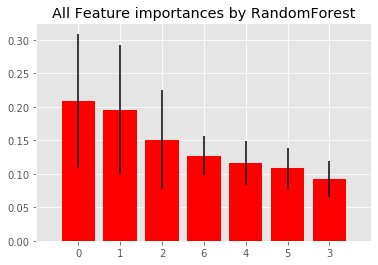

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [808]:
#forest2 = RandomForestClassifier(n_estimators = 100)

forest2 = RandomForestClassifier(n_estimators = 300)




forest2.fit(X_f, y_f)

importances_allfeatures2 = forest2.feature_importances_
#importances_allfeatures[:10]

std2 = np.std([tree.feature_importances_ for tree in forest2.estimators_],
             axis=0)
indices2 = np.argsort(importances_allfeatures2)[::-1]
for f in range(X_f.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_f.columns[indices2[f]], importances_allfeatures2[indices2[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("All Feature importances by RandomForest")
plt.bar(range(X_f.shape[1]), importances_allfeatures2[indices2],
       color="r", yerr=std2[indices2], align="center")
plt.xticks(range(X_f.shape[1]), indices2)
plt.xlim([-1, X_f.shape[1]])
plt.show()

accuracy_RF2 = cross_val_score(forest2,X_f,y_f,scoring = 'accuracy')
log_loss_RF2 = cross_val_score(forest2,X_f,y_f,scoring = 'neg_log_loss')

In [809]:
print("Accuracy: ", (accuracy_RF2.mean(), accuracy_RF2.std() * 2))
print("Log Loss: ", (log_loss_RF2.mean(), log_loss_RF2.std() * 2))

Accuracy:  (0.7146484698097602, 0.02526663895666129)
Log Loss:  (-0.5423959467464937, 0.03709292980960174)


In [810]:
y_pred = forest2.predict(test[['team1_log5','net_rating_diff', 'srs_diff', 'TOV_diff', 'diff_blockpct', 'diff_ftoverfgArate', 'diff_oppfg3pct']])
predictions = forest2.predict_proba(test[['team1_log5','net_rating_diff', 'srs_diff', 'TOV_diff', 'diff_blockpct', 'diff_ftoverfgArate', 'diff_oppfg3pct']])




In [472]:
x_test_norm = test[['team1_log5','seed_diff',
'win_tempo_diff',
'net_rating_diff',
'srs_diff',
'diff_blockpct',
'diff_oppfg3pct',
'diff_fg3pct',]]
y_test_norm = test[['team1_win']]

In [803]:
print(confusion_matrix(y_test_norm,y_pred))
print(classification_report(y_test_norm,y_pred))
print(accuracy_score(y_test_norm, y_pred))

[[ 61 103]
 [ 60 110]]
              precision    recall  f1-score   support

           0       0.50      0.37      0.43       164
           1       0.52      0.65      0.57       170

    accuracy                           0.51       334
   macro avg       0.51      0.51      0.50       334
weighted avg       0.51      0.51      0.50       334

0.5119760479041916


In [811]:
predictions

array([[0.7       , 0.3       ],
       [0.27      , 0.73      ],
       [0.06      , 0.94      ],
       [0.03      , 0.97      ],
       [0.52666667, 0.47333333],
       [0.30333333, 0.69666667],
       [0.47666667, 0.52333333],
       [0.42666667, 0.57333333],
       [0.60333333, 0.39666667],
       [0.11666667, 0.88333333],
       [0.84333333, 0.15666667],
       [0.73666667, 0.26333333],
       [0.67333333, 0.32666667],
       [0.93333333, 0.06666667],
       [0.66333333, 0.33666667],
       [0.31666667, 0.68333333],
       [0.60666667, 0.39333333],
       [0.58333333, 0.41666667],
       [0.69666667, 0.30333333],
       [0.26333333, 0.73666667],
       [0.25      , 0.75      ],
       [0.12      , 0.88      ],
       [0.35333333, 0.64666667],
       [0.80666667, 0.19333333],
       [0.21333333, 0.78666667],
       [0.68333333, 0.31666667],
       [0.99666667, 0.00333333],
       [0.3       , 0.7       ],
       [0.64      , 0.36      ],
       [0.23      , 0.77      ],
       [0.

## New Feature Selection RF

In [464]:
data_list = list(x_norm.columns)

TypeError: 'list' object is not callable

In [465]:
importances = list(forest2.feature_importances_)

TypeError: 'list' object is not callable

## Creating predictions with normalized best features selected

In [466]:
importances_allfeatures2

array([0.11909205, 0.09681673, 0.0623269 , 0.12339341, 0.11866473,
       0.10126522, 0.06405772, 0.08312801, 0.08127101, 0.0757207 ,
       0.07426351])

In [ ]:
example_submission = pd.read_csv('MM_2022_Data.csv')

# Feature Selection

In [314]:
selector3 = SelectPercentile(percentile = 15)
X_train_fs3 = selector3.fit_transform(X=train[['team1_log5', 'seed_diff','diff_ftoverfgArate','TRB_diff','diff_stlrate','win_tempo_diff',
'ast_stl_block_diff',
'net_rating_diff',
'adjtempo_diff',
'eFG_diff',
'TS_diff',
'diff_ORB']], y=train['team1_win'])
feature_names3 = train.columns.tolist()

In [315]:
allfeaturesByScore = [feature_names3[i] for i in np.argsort(selector3.scores_)[::-1]]
selected_columns_index = np.argsort(selector3.scores_)[::-1].tolist()[:30]
allfeaturesByScore[:34]

['game_id',
 'season',
 'exp_win2',
 'team2_id',
 'seed_diff',
 'team1_win',
 'team1_id',
 'team2_score',
 'diff_ftoverfgArate',
 'exp_win1',
 'team1_log5',
 'team1_score']

## Updated Random Forest 

In [272]:

from sklearn.feature_selection import RFECV



In [275]:
x_new2

,team1_log5,seed_diff,dist1,dist2,diff_dist,srs_diff,TOV_diff,TS_diff,TRB_diff,eFG_diff,...,diff_oppf3grate,diff_Arate,diff_opparate,diff_oppstlrate,diff_SOS,diff_pace,diff_ORtg,diff_3PAr,diff_ORB,diff_ftoverfgArate
0,0.647736,0,932.409301,1077.020619,-144.611318,8.53,0.3,-0.013,-2.9,-0.032,...,6.948800,0.188200,1.029600,-0.002900,10.46,0.0,0.0,0.116,0.0,0.016
1,0.911780,-13,970.079692,1058.900224,-88.820532,0.00,0.0,0.000,0.0,0.000,...,1.903400,-6.047300,-9.351900,-0.019500,7.67,0.0,0.0,0.339,0.0,0.300
2,0.789333,-11,513.690472,1211.232761,-697.542289,0.00,0.0,0.000,0.0,0.000,...,-7.467100,-9.307200,-3.699100,0.006100,12.47,0.0,0.0,0.336,0.0,0.326
3,0.982148,-15,148.431171,340.097686,-191.666514,35.44,2.2,0.082,-1.4,0.089,...,-7.625400,8.145100,-2.317600,-0.006800,17.36,0.0,0.0,0.013,0.0,0.025
4,0.692962,-7,3008.248664,859.271651,2148.977013,8.50,0.6,-0.017,0.6,-0.021,...,-0.280300,-5.227500,-3.340700,0.014800,6.89,0.0,0.0,-0.066,0.0,-0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,0.720863,2,960.607852,1245.143704,-284.535852,0.00,0.0,0.000,0.0,0.000,...,-3.267414,3.988583,-3.826836,0.014308,-8.74,-66.6,-106.4,-0.368,-25.8,-0.248
1108,0.648177,-6,3129.309539,3205.169334,-75.859795,3.25,3.0,0.002,-1.5,0.013,...,-7.400567,2.538631,-4.076133,-0.017868,0.91,-6.5,1.5,0.065,-6.6,-0.053
1109,0.695616,0,2413.515711,1102.407387,1311.108325,5.25,1.3,0.029,2.1,0.020,...,-2.885060,-2.701237,4.897709,-0.015848,-1.64,-0.1,6.8,0.063,0.0,0.038
1110,0.486853,-8,1947.730091,1704.964586,242.765505,0.00,0.0,0.000,0.0,0.000,...,-6.197621,-4.628863,-5.908401,-0.035943,9.41,65.7,111.0,0.433,25.4,0.203


In [276]:
y_new2

0       1
1       1
2       1
3       1
4       1
       ..
1107    1
1108    1
1109    1
1110    1
1111    1
Name: team1_win, Length: 1112, dtype: int64

In [278]:
X_train_uncorr

,0,2,3,6,7,8,10,12,13,14,16,17,18,19,20,21,23,25
0,0.263013,1153.514140,1459.032197,-3.2,0.4,6.8033,-10.626400,-0.925900,-4.490200,2.999800,-9.387300,-4.809600,-2.152600,3.034700,-2.48760,6.070500,2.385500,7.2
1,0.863782,175.427351,3066.285017,2.9,-1.4,-1.6670,6.342500,1.753400,1.850500,8.269600,0.412200,-1.635300,0.009500,1.026400,2.68440,3.484200,2.241400,-2.4
2,0.806662,521.586416,2043.141817,0.0,0.0,-5.8225,3.532935,1.998815,-0.345882,6.672815,-2.752634,-5.021582,-0.980558,1.103122,-2.18624,-2.092153,4.709559,65.3
3,0.961452,320.758638,1046.298588,3.3,4.1,-2.9368,13.760000,1.815100,10.478800,-4.644800,2.550100,-5.859900,-0.369400,-2.715500,-18.16340,-15.166300,-10.108500,0.0
4,0.384297,1398.594156,791.211807,-1.3,-1.5,0.2892,5.801800,-0.032900,3.821100,-2.119400,-8.111100,-0.945300,-0.811000,1.940200,-4.56050,-0.626900,-3.208400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.853371,179.178059,1343.079957,-1.6,5.5,7.0680,4.422000,6.410300,-1.397200,0.227600,4.240800,3.329000,11.121200,3.890800,8.82630,-2.367200,-7.706100,0.0
885,0.720134,1091.992815,767.895180,2.1,4.9,0.0054,3.080600,0.188900,1.261900,-3.568800,-3.038000,3.085800,1.945400,-2.417000,-1.70270,-1.513900,-10.721500,0.0
886,0.628777,259.742239,310.824901,0.0,0.0,-2.1699,-0.729700,0.817400,5.931500,12.225700,-3.235700,3.417700,-2.343900,-0.130300,-3.53050,11.081400,19.384500,67.2
887,0.540032,1263.984722,1702.339131,2.6,-3.0,-3.6000,8.114557,2.441230,-0.877990,11.213453,-5.843533,-1.054987,2.177787,1.159451,15.99627,-2.068781,1.587721,-4.2


In [280]:
x_list = list(X_train_uncorr.columns)
x_list

[0, 2, 3, 6, 7, 8, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 25]

In [273]:
min_features_to_select = 1 # Minimum number of features to consider
rfecv = RFECV(estimator=rf,step=1,cv=StratifiedKFold(),scoring="neg_log_loss")
rfecv.fit(x_new2, y_new2)

<IPython.core.display.Javascript object>

ValueError: got predict_proba of shape (223, 1), but need classifier with two classes for log_loss scoring

In [274]:
## use recursive feature eliminaiton and cross validation selection (randomForest)
## of the best number of features
rfecv = RFECV(estimator=forest, step=1, cv=StratifiedKFold(Y, 15),
              scoring='log_loss')
rfecv.fit(x_new2, y_new2)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

NameError: name 'forest' is not defined

In [181]:
x_all.shape, y_new.shape

((1112, 31), (1112, 1))

In [ ]:




##print 'All features:', feature_names
##print 'Scores of these features:', selector.scores_
allfeaturesByScore = [feature_names[i] for i in np.argsort(selector.scores_)[::-1]]
selected_columns_index = np.argsort(selector.scores_)[::-1].tolist()[:30]
allfeaturesByScore[:10]


featCorr = x2.corr()

def corr_func(x2, corrMin):
    corr_col = set()
    corrmat = x2.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> corrMin:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corrFeat = corr_func(x2, 0.85)
corrFeat